<a href="https://colab.research.google.com/github/FareedPatel420/Cyclist-Alert-System/blob/main/Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## To check the Final Outcome Video of my Research project, Kindly navigate to the last section with heading "Testing XGBoost, trained without depth map features on a video sequesnce"

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
%pip install torch pillow
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#@Test Vehicle Detection

100%|██████████| 6.23M/6.23M [00:00<00:00, 100MB/s]



0: 224x640 2 cars, 123.6ms
Speed: 16.6ms preprocess, 123.6ms inference, 41.1ms postprocess per image at shape (1, 3, 224, 640)


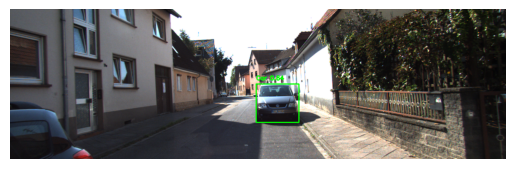

In [3]:
import torch
from PIL import Image
import numpy as np
import cv2
import ultralytics
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Assuming you have a YOLO class or function to load the model
model = YOLO("yolov8n.pt")

# Load the image
img = Image.open('/content/gdrive/MyDrive/images/000003.png')

# Perform inference
results = model(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# Convert the PIL image to a NumPy array for visualization
img_np = np.array(img)

# Filter out boxes and confidences for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()
confidences = bounding_boxes.conf[mask].cpu().numpy()

# Draw the bounding boxes on the image
for i, box in enumerate(boxes_xyxy):
    color = (0, 255, 0)  # green
    cv2.rectangle(img_np, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), color, 2)
    cv2.putText(img_np, f"Car {confidences[i]:.2f}", (int(box[0]), int(box[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Display the image with bounding boxes
plt.imshow(img_np)
plt.axis('off')
plt.show()


#@Install ADABINS

In [ ]:
%cd /content/gdrive/MyDrive
!git clone 'https://github.com/shariqfarooq123/AdaBins'
%cd AdaBins
"""
Download pretrained models
"""

!gdown https://drive.google.com/uc?id=1lvyZZbC9NLcS8a__YPcUP7rDiIpbRpoF
!gdown https://drive.google.com/uc?id=1HMgff-FV6qw1L0ywQZJ7ECa9VPq1bIoj
!mkdir pretrained
!mv AdaBins_nyu.pt pretrained/AdaBins_nyu.pt
!mv AdaBins_kitti.pt pretrained/AdaBins_kitti.pt



#@Test Adabins

In [3]:
%cd /content/gdrive/MyDrive/AdaBins
from infer import InferenceHelper
from PIL import Image
import matplotlib.pyplot as plt

/content/gdrive/MyDrive/AdaBins


Loading base model ()...

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-weights/tf_efficientnet_b5_ap-9e82fae8.pth" to /root/.cache/torch/hub/checkpoints/tf_efficientnet_b5_ap-9e82fae8.pth


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.


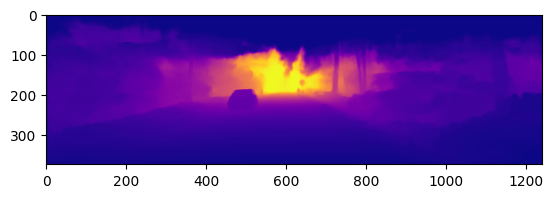

In [5]:
from infer import InferenceHelper
from PIL import Image
import matplotlib.pyplot as plt

infer_helper = InferenceHelper(dataset='kitti')

# predict depth of a single pillow image
img = Image.open("/content/gdrive/MyDrive/images/000013.png")  # any rgb pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)

plt.imshow(predicted_depth[0][0], cmap='plasma')
plt.show()


0: 224x640 1 car, 12.8ms
Speed: 1.8ms preprocess, 12.8ms inference, 9.1ms postprocess per image at shape (1, 3, 224, 640)
Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.


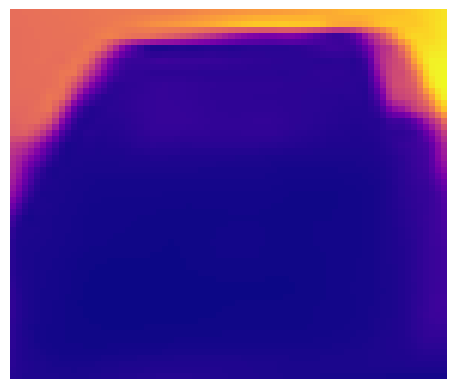

In [6]:
import torch
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from infer import InferenceHelper

# YOLO
# Assuming you have a YOLO class or function to load the model
model = YOLO("yolov8n.pt")

# Load the image
img = Image.open('/content/gdrive/MyDrive/images/000013.png')

# Perform inference
results = model(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# Convert the PIL image to a NumPy array for visualization
img_np = np.array(img)

# Filter out boxes and confidences for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()
confidences = bounding_boxes.conf[mask].cpu().numpy()

# AdaBins
infer_helper = InferenceHelper(dataset='kitti')

# predict depth of a single pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)
predicted_depth_np = predicted_depth[0][0]

# Crop the bounding boxes from the depth map
cropped_depths = []
for box in boxes_xyxy:
    cropped_depth = predicted_depth_np[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    cropped_depths.append(cropped_depth)

# Display the cropped depth maps
for depth in cropped_depths:
    plt.imshow(depth, cmap='plasma')
    plt.axis('off')
    plt.show()

#@Test Distance estimation and angle estimation with depth map features. Model: xgboost_model_20features.pkl


0: 224x640 2 cars, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.


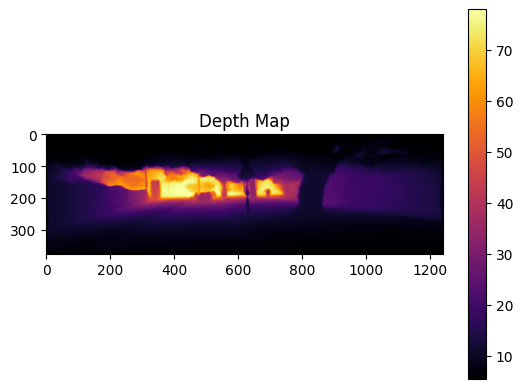

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:25:24] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


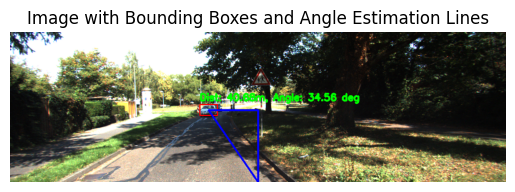

Calculated angles for bounding boxes: [34.562524648881805]
Predicted distances for bounding boxes: [     40.684]


In [7]:
import torch
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import joblib
from infer import InferenceHelper
import xgboost as xgb
from PIL import ImageFont


# Assuming you have a YOLO class or function to load the model
model_yolo = YOLO("yolov8n.pt")

# Load the image
img_path = '/content/gdrive/MyDrive/images/000040.png'
img = Image.open(img_path)
draw = ImageDraw.Draw(img)  # Create a draw object to add bounding boxes to the image

# Perform YOLO inference
results = model_yolo(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# AdaBins
infer_helper = InferenceHelper(dataset='kitti')

# Predict depth of a single pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)
predicted_depth_np = predicted_depth[0][0]

# Display the depth map
plt.imshow(predicted_depth_np, cmap='inferno')
plt.colorbar()
plt.title('Depth Map')
plt.show()

def get_depth_features(depth_crop):
    # Be cautious with the depth values, if they are not integers, you may need a different approach to find the mode
    average_depth = np.mean(depth_crop)
    depth_variance = np.var(depth_crop)
    depth_median = np.median(depth_crop)
    depth_mode = np.bincount(depth_crop.astype(int).flatten()).argmax() if depth_crop.size else 0
    depth_range = np.ptp(depth_crop)
    depth_percentile_diff = np.percentile(depth_crop, 75) - np.percentile(depth_crop, 25)

    return average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff

# Load the trained Random Forest model
model_path = "/content/gdrive/MyDrive/Models/xgboost_model_20features.pkl"
# Instead of joblib, you can directly use XGBoost's load_model function
xgb_model = xgb.XGBRegressor()
xgb_model = joblib.load(model_path)

# Filter out boxes for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

features_list = []
for box in boxes_xyxy:
    cropped_depth = predicted_depth_np[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff = get_depth_features(cropped_depth)

    BBox_left, BBox_top, BBox_right, BBox_bottom = box
    BBox_Width = BBox_right - BBox_left
    BBox_Height = BBox_bottom - BBox_top
    Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
    Aspect_Ratio = BBox_Width / BBox_Height
    Box_Area = BBox_Width * BBox_Height
    Box_Perimeter = 2 * (BBox_Width + BBox_Height)
    Centroid_x = (BBox_left + BBox_right) / 2
    Centroid_y = (BBox_top + BBox_bottom) / 2

    features = [
        BBox_left, BBox_top, BBox_right, BBox_bottom, average_depth,
        depth_variance, depth_median, depth_mode, depth_range,
        depth_percentile_diff, BBox_Width, BBox_Height, Diagonal,
        Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y
    ]
    features_list.append(features)

# Use the XGBoost model to predict the distance for each bounding box
predicted_distances = xgb_model.predict(np.array(features_list))

# Define the color for the lines
color = 'blue'  # PIL uses color names or tuples to define colors

# Get screen dimensions from the image
screen_center_x = img.width // 2
y_base = img.height  # Bottom of the image

# Function to calculate the angle
def calculate_angle(screen_center_x, Centroid_x, L1_distance, L1_pixel_length, L3_pixel_length):
    # Calculate real-world distance of L3 using pixel ratio
    L3_real_distance = (L3_pixel_length / L1_pixel_length) * L1_distance

    # Calculate the angle theta using arccos
    # Ensure L3_real_distance is not greater than L1_distance to avoid math domain error
    theta_rad = np.arccos(min(L3_real_distance / L1_distance, 1))

    # Convert from radians to degrees
    theta_deg = np.degrees(theta_rad)

    # Determine the direction of the angle based on the position of the bounding box
    if Centroid_x < screen_center_x:
        # Bounding box is to the left of the screen center, angle is positive
        return theta_deg
    else:
        # Bounding box is to the right of the screen center, angle is negative
        return -theta_deg

# Convert the PIL Image to a NumPy array for OpenCV
img_np = np.array(img)

# Convert RGB to BGR (OpenCV uses BGR by default)
img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

font_scale = 0.8  # OpenCV font scale
font_thickness = 4  # Thickness of the font
blue_color = (255, 0, 0)  # Blue color in BGR

angles = []
# Define threshold values
max_distance = 50.0  # cars within 5 meters
lower_degree = 0  # 0 degree
higher_degree = 40  # 40 degrees

# Define colors
green_color = (0, 255, 0)
red_color = (0, 0, 255)

for box, L1_distance in zip(boxes_xyxy, predicted_distances):
    BBox_left, BBox_top, BBox_right, BBox_bottom = box[:4]
    x_center_bbox = int((BBox_left + BBox_right) / 2)
    y_center_bbox = int((BBox_top + BBox_bottom) / 2)

    L1_pixel_length = np.sqrt((x_center_bbox - screen_center_x)**2 + (y_center_bbox - y_base)**2)
    L3_pixel_length = abs(y_center_bbox - y_base)  # Calculate the vertical pixel distance

    # Call the modified function with these values
    angle = calculate_angle(screen_center_x, x_center_bbox, L1_distance, L1_pixel_length, L3_pixel_length)

    angles.append(angle)

    # Check if the detected car is within the distance and angle thresholds
    if L1_distance <= max_distance and lower_degree <= angle <= higher_degree:
        bbox_color = red_color
    else:
        bbox_color = green_color

    # Draw bounding box, lines, and text using cv2 with the determined color
    cv2.rectangle(img_np, (int(BBox_left), int(BBox_top)), (int(BBox_right), int(BBox_bottom)), bbox_color, 2)

    cv2.line(img_np, (screen_center_x, y_base), (x_center_bbox, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (x_center_bbox, y_center_bbox), (screen_center_x, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (screen_center_x, y_base), (screen_center_x, y_center_bbox), blue_color, font_thickness)

    display_text = f"Dist: {L1_distance:.2f}m, Angle: {angle:.2f} deg"
    text_x = int(BBox_left)
    text_y = int(BBox_top) - 10
    if text_y < 0:
        text_y = int(BBox_bottom) + 20
    cv2.putText(img_np, display_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), font_thickness)

# Display the image with bounding boxes and lines
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
plt.title('Image with Bounding Boxes and Angle Estimation Lines')
plt.axis('off')  # Hide the axes
plt.show()

# Print out the calculated angles
print("Calculated angles for bounding boxes:", angles)
print("Predicted distances for bounding boxes:", predicted_distances)






#@Vehicle Detection using Trained Model

In [1]:
from ultralytics import YOLO
import cv2

# Load your custom trained YOLOv8 model
model_path = '/content/gdrive/MyDrive/runs/detect/train8/weights/best.pt'
model = YOLO(model_path)
model.conf = 0.55  # Set a new confidence threshold
model.iou = 0.45   # Set a new IoU threshold for NMS

# Image or video path
source = '/content/gdrive/MyDrive/Research Video.mp4'

# Open video file for reading
cap = cv2.VideoCapture(source)
if not cap.isOpened():
    print("Error opening video file.")
    exit()

fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Open video file for writing
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/gdrive/MyDrive/Output Video/Vehicle detection annotated_video.mp4', fourcc, fps, (width, height))
if not out.isOpened():
    print("Error opening video file for writing.")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Make detections on the frame
    results = model(frame)

    # Access the first (and likely only) Results object in the list
    result = results[0]

    # Draw the bounding boxes and labels onto the frame
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    out.write(frame)

cap.release()
out.release()



0: 384x640 1 Car, 106.6ms
Speed: 4.5ms preprocess, 106.6ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 11.1ms
Speed: 2.9ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 11.0ms
Speed: 2.7ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 11.0ms
Speed: 2.8ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 11.0ms
Speed: 2.9ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 11.1ms
Speed: 2.9ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Car, 11.0ms
Speed: 3.0ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 

#@Test Model on Video with depth map features

In [10]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import joblib
from infer import InferenceHelper  # Make sure this is correctly installed
import xgboost as xgb
from ultralytics import YOLO
import torch
from time import time

# Load the YOLO model
model_path = 'yolov8n.pt'
model = YOLO(model_path)
model.conf = 0.55
model.iou = 0.45

# Check if CUDA is available and set the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(model.device)

# Load the XGBoost model
xgb_model_path = "/content/gdrive/MyDrive/Models/random_forest_model_20features.pkl"
xgb_model = joblib.load(xgb_model_path)

# Initialize AdaBins infer_helper
infer_helper = InferenceHelper(dataset='kitti', device=device)

# Define the function to extract depth features
def get_depth_features(depth_crop):
    average_depth = np.mean(depth_crop)
    depth_variance = np.var(depth_crop)
    depth_median = np.median(depth_crop)
    depth_mode = np.bincount(depth_crop.astype(int).flatten()).argmax() if depth_crop.size else 0
    depth_range = np.ptp(depth_crop)
    depth_percentile_diff = np.percentile(depth_crop, 75) - np.percentile(depth_crop, 25)
    return average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff

# Function to calculate the angle
def calculate_angle(screen_center_x, y_base, x_center_bbox, y_center_bbox, L1_distance):
    L1_pixel_length = np.sqrt((x_center_bbox - screen_center_x)**2 + (y_center_bbox - y_base)**2)
    L2_pixel_length = abs(x_center_bbox - screen_center_x)
    L2_real_distance = (L2_pixel_length / L1_pixel_length) * L1_distance
    theta_rad = np.arctan(L2_real_distance / L1_distance)

    # Determine the direction of the angle based on the position of the bounding box
    if x_center_bbox < screen_center_x:
        # Bounding box is to the left of the screen center, angle is positive
        theta_deg = np.degrees(theta_rad)
    else:
        # Bounding box is to the right of the screen center, angle is negative
        theta_deg = -np.degrees(theta_rad)

    return theta_deg

# Video source path
source = '/content/gdrive/MyDrive/Research Video.mp4'

# Load video
cap = cv2.VideoCapture(source)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out_width = 1242
out_height = 375

# Define threshold values
max_distance = 50.0  # cars within 5 meters
lower_degree = 0  # 0 degree
higher_degree = 40  # 40 degrees

# Define colors
green_color = (0, 255, 0)
red_color = (0, 0, 255)
blue_color = (255, 0, 0)  # Blue color in BGR

font_scale = 0.8  # OpenCV font scale
font_thickness = 4  # Thickness of the font

screen_center_x = out_width // 2
y_base = out_height

# Define codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/gdrive/MyDrive/Output Video/Test_Vehicle_Video with depth features.mp4',
                      fourcc, fps, (out_width, out_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to PIL Image for depth prediction
    frame = cv2.resize(frame, (out_width, out_height))
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Perform YOLO inference on the frame
    start = time()
    results = model(frame)
    print(f"Object_Detection :{time() - start}s")

    start = time()
    _, predicted_depth = infer_helper.predict_pil(img_pil)
    print(f"Depth_Estimation :{time() - start}s")

    predicted_depth_np = predicted_depth.squeeze()


    bounding_boxes = results[0].boxes

    # Filter out boxes for detected cars with confidence > 60%
    mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
    boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

    # Process each detection
    for box in boxes_xyxy:
        x1, y1, x2, y2 = map(int, box[:4])

        """
        Edit (Commented)
        """
        # confidence = det[4].item()
        # class_id = int(det[5].item())
        # label = f"{results.names[class_id]} {confidence:.2f}"

        # Extract depth features for the bounding box
        depth_crop = predicted_depth_np[y1:y2, x1:x2]
        depth_features = get_depth_features(depth_crop)

        # Extract additional features for the bounding box
        BBox_Width = x2 - x1
        BBox_Height = y2 - y1
        Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
        Aspect_Ratio = BBox_Width / BBox_Height
        Box_Area = BBox_Width * BBox_Height
        Box_Perimeter = 2 * (BBox_Width + BBox_Height)
        Centroid_x = (x1 + x2) // 2
        Centroid_y = (y1 + y2) // 2

        features = [
            x1, y1, x2, y2,
            *depth_features,
            BBox_Width, BBox_Height, Diagonal,
            Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y
        ]

        # Predict the distance using the XGBoost model
        L1_distance = xgb_model.predict(np.array([features]))[0]

        # Calculate the angle
        angle = calculate_angle(screen_center_x, y_base, Centroid_x, Centroid_y, L1_distance)

        # Check if the detected car is within the distance and angle thresholds
        if L1_distance <= max_distance and lower_degree <= angle <= higher_degree:
            bbox_color = red_color
        else:
            bbox_color = green_color

        # Draw bounding box, labels, lines, and text using cv2
        cv2.rectangle(frame, (x1, y1), (x2, y2), bbox_color, 2)

        cv2.line(frame, (screen_center_x, y_base), (Centroid_x, Centroid_y), blue_color, font_thickness)
        cv2.line(frame, (Centroid_x, Centroid_y), (screen_center_x, Centroid_y), blue_color, font_thickness)
        cv2.line(frame, (screen_center_x, y_base), (screen_center_x, Centroid_y), blue_color, font_thickness)

        """
        Edit (Commented)
        """
        # cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        display_text = f"Dist: {L1_distance:.2f}m, Angle: {angle:.2f}deg"
        cv2.putText(frame, display_text, (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write the annotated frame to the output video file
    out.write(frame)

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()


cuda:0
Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.

0: 224x640 1 car, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.12052083015441895s
Depth_Estimation :0.40584897994995117s

0: 224x640 1 car, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.019832134246826172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3326849937438965s

0: 224x640 1 car, 10.9ms
Speed: 2.4ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022235870361328125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3324270248413086s

0: 224x640 1 car, 7.5ms
Speed: 1.7ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02143692970275879s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33560967445373535s

0: 224x640 1 car, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022157669067382812s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3345215320587158s

0: 224x640 1 car, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.019661903381347656s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33417677879333496s

0: 224x640 1 car, 7.8ms
Speed: 2.7ms preprocess, 7.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021034717559814453s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33627796173095703s

0: 224x640 1 car, 8.1ms
Speed: 1.3ms preprocess, 8.1ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022684097290039062s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3345780372619629s

0: 224x640 1 car, 7.7ms
Speed: 1.5ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02016448974609375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3361093997955322s

0: 224x640 1 car, 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02087259292602539s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3350179195404053s

0: 224x640 1 car, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.01947808265686035s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33797502517700195s

0: 224x640 1 car, 8.8ms
Speed: 1.7ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020294904708862305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3349485397338867s

0: 224x640 1 car, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021009445190429688s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3372504711151123s

0: 224x640 1 car, 8.0ms
Speed: 2.0ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02137470245361328s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3327028751373291s

0: 224x640 1 car, 8.1ms
Speed: 2.6ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021093130111694336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3353850841522217s

0: 224x640 1 car, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020045757293701172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34171056747436523s

0: 224x640 1 car, 11.1ms
Speed: 2.2ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029342174530029297s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34745073318481445s

0: 224x640 1 car, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02844858169555664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34915733337402344s

0: 224x640 1 car, 13.8ms
Speed: 1.8ms preprocess, 13.8ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027194976806640625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3497896194458008s

0: 224x640 1 car, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02164435386657715s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35043764114379883s

0: 224x640 1 car, 9.6ms
Speed: 3.9ms preprocess, 9.6ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027121305465698242s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35300683975219727s

0: 224x640 1 car, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03195977210998535s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3496396541595459s

0: 224x640 1 car, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02195262908935547s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35001230239868164s

0: 224x640 1 car, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02754950523376465s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3486790657043457s

0: 224x640 1 car, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027878522872924805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3540806770324707s

0: 224x640 1 car, 12.7ms
Speed: 2.9ms preprocess, 12.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031417131423950195s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34825682640075684s

0: 224x640 1 car, 1 boat, 10.4ms
Speed: 2.2ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030164718627929688s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3483586311340332s

0: 224x640 1 car, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028331518173217773s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3489856719970703s

0: 224x640 1 car, 10.4ms
Speed: 2.4ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027139902114868164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34888672828674316s

0: 224x640 1 car, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02686309814453125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3479182720184326s

0: 224x640 1 car, 12.8ms
Speed: 2.9ms preprocess, 12.8ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0273134708404541s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34504055976867676s

0: 224x640 1 car, 9.9ms
Speed: 2.6ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020665407180786133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34274888038635254s

0: 224x640 1 car, 7.9ms
Speed: 2.6ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.018573999404907227s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34041619300842285s

0: 224x640 1 car, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02125263214111328s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3405928611755371s

0: 224x640 1 car, 7.3ms
Speed: 1.8ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.019902467727661133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33921003341674805s

0: 224x640 1 car, 7.2ms
Speed: 1.8ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020417451858520508s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3390045166015625s

0: 224x640 1 car, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02101922035217285s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34093546867370605s

0: 224x640 1 car, 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021181344985961914s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33867979049682617s

0: 224x640 1 car, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02147388458251953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33826160430908203s

0: 224x640 2 cars, 11.3ms
Speed: 1.9ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021536588668823242s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3431870937347412s

0: 224x640 1 car, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02199554443359375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3430051803588867s

0: 224x640 1 car, 7.5ms
Speed: 4.5ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02158212661743164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33940768241882324s

0: 224x640 1 car, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02276921272277832s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3379218578338623s

0: 224x640 1 car, 7.7ms
Speed: 1.7ms preprocess, 7.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02330803871154785s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3428072929382324s

0: 224x640 1 car, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02184152603149414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3420419692993164s

0: 224x640 1 car, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02234482765197754s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34052085876464844s

0: 224x640 1 car, 7.7ms
Speed: 4.3ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02373528480529785s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33925414085388184s

0: 224x640 1 car, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02156805992126465s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34101343154907227s

0: 224x640 1 car, 9.8ms
Speed: 2.0ms preprocess, 9.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02059316635131836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3416876792907715s

0: 224x640 1 car, 7.6ms
Speed: 2.4ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022660493850708008s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.33765363693237305s

0: 224x640 1 car, 7.4ms
Speed: 3.2ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.019850730895996094s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34163498878479004s

0: 224x640 1 car, 7.4ms
Speed: 2.1ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020543575286865234s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34177684783935547s

0: 224x640 1 car, 7.2ms
Speed: 2.4ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021329402923583984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3369266986846924s

0: 224x640 1 car, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0200350284576416s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3300514221191406s

0: 224x640 1 car, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0229034423828125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3438379764556885s

0: 224x640 1 car, 10.7ms
Speed: 2.3ms preprocess, 10.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021570920944213867s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3445394039154053s

0: 224x640 1 car, 7.2ms
Speed: 1.5ms preprocess, 7.2ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020434141159057617s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3462486267089844s

0: 224x640 1 car, 14.8ms
Speed: 1.9ms preprocess, 14.8ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029953956604003906s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3573586940765381s

0: 224x640 1 car, 13.2ms
Speed: 2.5ms preprocess, 13.2ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024975061416625977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35329651832580566s

0: 224x640 1 car, 11.5ms
Speed: 3.4ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02542281150817871s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35705089569091797s

0: 224x640 1 car, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.019789457321166992s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35982322692871094s

0: 224x640 1 car, 11.3ms
Speed: 3.9ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02882695198059082s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35529565811157227s

0: 224x640 1 car, 9.8ms
Speed: 3.6ms preprocess, 9.8ms inference, 5.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026204586029052734s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36077260971069336s

0: 224x640 1 car, 13.4ms
Speed: 1.7ms preprocess, 13.4ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027846813201904297s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35437846183776855s

0: 224x640 1 car, 17.6ms
Speed: 3.8ms preprocess, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03170156478881836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3570528030395508s

0: 224x640 1 car, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028409481048583984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35889649391174316s

0: 224x640 1 car, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.019591569900512695s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3530154228210449s

0: 224x640 1 car, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02099323272705078s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3562495708465576s

0: 224x640 1 car, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02068781852722168s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35738706588745117s

0: 224x640 1 car, 12.2ms
Speed: 1.9ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02552628517150879s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3586745262145996s

0: 224x640 1 car, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030012845993041992s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36017727851867676s

0: 224x640 1 car, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03019571304321289s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35579395294189453s

0: 224x640 1 car, 9.3ms
Speed: 1.9ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021931171417236328s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34960031509399414s

0: 224x640 1 car, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02094411849975586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3483269214630127s

0: 224x640 1 car, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022908926010131836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3493201732635498s

0: 224x640 1 car, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0200045108795166s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3486166000366211s

0: 224x640 1 car, 7.1ms
Speed: 1.5ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021322250366210938s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34832048416137695s

0: 224x640 1 car, 7.6ms
Speed: 6.3ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021701574325561523s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3493533134460449s

0: 224x640 1 car, 9.5ms
Speed: 3.9ms preprocess, 9.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022917985916137695s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3489034175872803s

0: 224x640 1 car, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021712303161621094s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34765195846557617s

0: 224x640 1 car, 7.3ms
Speed: 2.2ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023732662200927734s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3502349853515625s

0: 224x640 1 car, 7.4ms
Speed: 1.4ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021287918090820312s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3512084484100342s

0: 224x640 1 car, 8.0ms
Speed: 1.7ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022994518280029297s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34876346588134766s

0: 224x640 1 car, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021618127822875977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3505129814147949s

0: 224x640 1 car, 8.0ms
Speed: 2.5ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024303913116455078s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3490736484527588s

0: 224x640 1 car, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022497892379760742s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35196471214294434s

0: 224x640 1 car, 8.7ms
Speed: 2.4ms preprocess, 8.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022309541702270508s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34928178787231445s

0: 224x640 1 car, 8.4ms
Speed: 2.1ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027292251586914062s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35036754608154297s

0: 224x640 1 car, 9.6ms
Speed: 2.3ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023033618927001953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3497035503387451s

0: 224x640 1 car, 10.1ms
Speed: 2.7ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023808717727661133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3508565425872803s

0: 224x640 1 car, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0199587345123291s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3514277935028076s

0: 224x640 1 car, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028754472732543945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35123515129089355s

0: 224x640 1 car, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022701263427734375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34922242164611816s

0: 224x640 1 car, 7.8ms
Speed: 5.3ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022336483001708984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3519861698150635s

0: 224x640 1 car, 8.8ms
Speed: 2.0ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02426886558532715s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3540980815887451s

0: 224x640 1 car, 9.2ms
Speed: 2.3ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02191472053527832s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3511161804199219s

0: 224x640 1 car, 7.7ms
Speed: 1.9ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021094322204589844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35416364669799805s

0: 224x640 1 car, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022169828414916992s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35593104362487793s

0: 224x640 1 car, 9.7ms
Speed: 1.6ms preprocess, 9.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027422428131103516s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.358353853225708s

0: 224x640 1 car, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03746962547302246s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3617236614227295s

0: 224x640 1 car, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02505779266357422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.359546422958374s

0: 224x640 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0214998722076416s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3612504005432129s

0: 224x640 1 car, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02130722999572754s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3577382564544678s

0: 224x640 1 car, 13.9ms
Speed: 1.7ms preprocess, 13.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024370193481445312s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3600647449493408s

0: 224x640 1 car, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02963113784790039s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35915470123291016s

0: 224x640 1 car, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030650615692138672s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3585014343261719s

0: 224x640 1 car, 13.1ms
Speed: 2.2ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025719642639160156s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36179447174072266s

0: 224x640 1 car, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03167223930358887s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.358306884765625s

0: 224x640 1 car, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 3.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02398085594177246s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3652329444885254s

0: 224x640 1 car, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027544021606445312s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36391353607177734s

0: 224x640 1 car, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02474355697631836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36042356491088867s

0: 224x640 1 car, 11.0ms
Speed: 3.2ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029581785202026367s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3578450679779053s

0: 224x640 1 car, 9.1ms
Speed: 1.8ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.019904136657714844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35166168212890625s

0: 224x640 1 car, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022848129272460938s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.352586030960083s

0: 224x640 1 car, 9.2ms
Speed: 2.1ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022917747497558594s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3478374481201172s

0: 224x640 1 car, 7.3ms
Speed: 1.2ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021334171295166016s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3512454032897949s

0: 224x640 1 car, 19.3ms
Speed: 1.8ms preprocess, 19.3ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029214143753051758s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3514554500579834s

0: 224x640 1 car, 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021149873733520508s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34891629219055176s

0: 224x640 1 car, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022617578506469727s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3504197597503662s

0: 224x640 1 car, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02085709571838379s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3464694023132324s

0: 224x640 1 car, 7.5ms
Speed: 1.2ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021480798721313477s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34863877296447754s

0: 224x640 1 car, 21.3ms
Speed: 1.9ms preprocess, 21.3ms inference, 2.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03499007225036621s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34636783599853516s

0: 224x640 1 car, 8.8ms
Speed: 3.1ms preprocess, 8.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023190975189208984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34792590141296387s

0: 224x640 1 car, 7.4ms
Speed: 2.3ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020944595336914062s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34857702255249023s

0: 224x640 1 car, 9.0ms
Speed: 2.1ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021020889282226562s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3479015827178955s

0: 224x640 1 car, 8.3ms
Speed: 2.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021541595458984375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3484976291656494s

0: 224x640 1 car, 8.9ms
Speed: 2.9ms preprocess, 8.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023728132247924805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35047316551208496s

0: 224x640 1 car, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023899316787719727s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34615445137023926s

0: 224x640 1 car, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022445201873779297s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34734320640563965s

0: 224x640 1 car, 9.9ms
Speed: 1.7ms preprocess, 9.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020263671875s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35092806816101074s

0: 224x640 1 car, 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025339365005493164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34369826316833496s

0: 224x640 1 car, 8.2ms
Speed: 1.3ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024081707000732422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3477909564971924s

0: 224x640 1 car, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02443408966064453s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34422945976257324s

0: 224x640 1 car, 9.3ms
Speed: 1.8ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024080276489257812s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34719324111938477s

0: 224x640 1 car, 7.6ms
Speed: 1.2ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022710561752319336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34586310386657715s

0: 224x640 1 car, 8.3ms
Speed: 3.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022563457489013672s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3461880683898926s

0: 224x640 1 car, 10.1ms
Speed: 4.3ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02306818962097168s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3520224094390869s

0: 224x640 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.019884347915649414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35234665870666504s

0: 224x640 1 car, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02964162826538086s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35294365882873535s

0: 224x640 1 car, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020703554153442383s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.355130672454834s

0: 224x640 1 car, 8.8ms
Speed: 1.8ms preprocess, 8.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029184579849243164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35836052894592285s

0: 224x640 1 car, 10.5ms
Speed: 4.8ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029427051544189453s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3557257652282715s

0: 224x640 1 car, 17.0ms
Speed: 3.8ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031154155731201172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3597540855407715s

0: 224x640 1 car, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03650498390197754s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35959386825561523s

0: 224x640 1 car, 13.9ms
Speed: 1.8ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03156399726867676s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3564414978027344s

0: 224x640 1 car, 11.5ms
Speed: 4.3ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0318911075592041s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3541135787963867s

0: 224x640 1 car, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022511959075927734s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35318994522094727s

0: 224x640 1 car, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029401063919067383s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3544619083404541s

0: 224x640 1 car, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031644344329833984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36311817169189453s

0: 224x640 1 car, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026098251342773438s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.352003812789917s

0: 224x640 2 cars, 15.6ms
Speed: 4.1ms preprocess, 15.6ms inference, 2.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03189969062805176s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3523731231689453s

0: 224x640 1 car, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 2.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03014993667602539s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35210394859313965s

0: 224x640 1 car, 23.6ms
Speed: 8.3ms preprocess, 23.6ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.052314043045043945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.37723636627197266s

0: 224x640 1 car, 11.3ms
Speed: 5.0ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027628183364868164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3470127582550049s

0: 224x640 1 car, 7.0ms
Speed: 1.3ms preprocess, 7.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025296688079833984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34230995178222656s

0: 224x640 1 car, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021477699279785156s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3453545570373535s

0: 224x640 1 car, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024900436401367188s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34293627738952637s

0: 224x640 1 car, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025699138641357422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3423473834991455s

0: 224x640 1 car, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022197961807250977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3428788185119629s

0: 224x640 1 car, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020195722579956055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3452162742614746s

0: 224x640 1 car, 17.1ms
Speed: 1.8ms preprocess, 17.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029886960983276367s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3451685905456543s

0: 224x640 1 car, 7.7ms
Speed: 1.3ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02478480339050293s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.345639705657959s

0: 224x640 1 car, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026795148849487305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34070515632629395s

0: 224x640 1 car, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020543575286865234s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3455319404602051s

0: 224x640 1 car, 12.9ms
Speed: 1.8ms preprocess, 12.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02429652214050293s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34397244453430176s

0: 224x640 1 car, 7.2ms
Speed: 1.6ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022031784057617188s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34075474739074707s

0: 224x640 1 car, 7.9ms
Speed: 1.4ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02312779426574707s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3439929485321045s

0: 224x640 1 car, 7.9ms
Speed: 1.3ms preprocess, 7.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023680448532104492s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34378767013549805s

0: 224x640 1 car, 8.3ms
Speed: 1.3ms preprocess, 8.3ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022578716278076172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3434891700744629s

0: 224x640 1 car, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02656722068786621s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3411519527435303s

0: 224x640 1 car, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02191329002380371s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34173583984375s

0: 224x640 1 car, 8.5ms
Speed: 1.6ms preprocess, 8.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026537179946899414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.337047815322876s

0: 224x640 1 car, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021945714950561523s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34284162521362305s

0: 224x640 1 car, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02050161361694336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34172844886779785s

0: 224x640 1 car, 9.9ms
Speed: 1.6ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02228546142578125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34103870391845703s

0: 224x640 1 car, 9.0ms
Speed: 3.0ms preprocess, 9.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023814678192138672s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34589481353759766s

0: 224x640 1 car, 7.7ms
Speed: 1.8ms preprocess, 7.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021147966384887695s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34442615509033203s

0: 224x640 1 car, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024206876754760742s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3444344997406006s

0: 224x640 1 car, 14.3ms
Speed: 1.9ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031245946884155273s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35497188568115234s

0: 224x640 1 car, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029356718063354492s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35275745391845703s

0: 224x640 1 car, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02099013328552246s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3478207588195801s

0: 224x640 1 car, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 2.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022609710693359375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3467061519622803s

0: 224x640 1 car, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0210874080657959s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34611988067626953s

0: 224x640 1 car, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02730727195739746s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34711384773254395s

0: 224x640 1 car, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02583789825439453s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34613895416259766s

0: 224x640 1 car, 13.5ms
Speed: 2.0ms preprocess, 13.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03292679786682129s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34862780570983887s

0: 224x640 1 car, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 2.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03125596046447754s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35230135917663574s

0: 224x640 1 car, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03136301040649414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3745114803314209s

0: 224x640 1 car, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025123119354248047s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3515164852142334s

0: 224x640 1 car, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 2.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028981447219848633s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3498072624206543s

0: 224x640 1 car, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02383708953857422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3480055332183838s

0: 224x640 1 person, 1 car, 10.4ms
Speed: 3.0ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02641749382019043s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3491029739379883s

0: 224x640 1 person, 15.7ms
Speed: 4.0ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02832961082458496s
Depth_Estimation :0.3494682312011719s

0: 224x640 (no detections), 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02463531494140625s
Depth_Estimation :0.35145139694213867s

0: 224x640 (no detections), 7.5ms
Speed: 1.8ms preprocess, 7.5ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023079633712768555s
Depth_Estimation :0.3395092487335205s

0: 224x640 (no detections), 8.7ms
Speed: 2.0ms preprocess, 8.7ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023136138916015625s
Depth_Estimation :0.3398003578186035s

0: 224x640 (no detections), 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 224, 640)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4072554111480713s

0: 224x640 1 car, 40.6ms
Speed: 1.8ms preprocess, 40.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.07893514633178711s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4214644432067871s

0: 224x640 1 car, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024785518646240234s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3631761074066162s

0: 224x640 2 cars, 10.9ms
Speed: 3.9ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0334014892578125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3575611114501953s

0: 224x640 1 car, 17.2ms
Speed: 1.8ms preprocess, 17.2ms inference, 7.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0726158618927002s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3685760498046875s

0: 224x640 1 car, 31.3ms
Speed: 8.4ms preprocess, 31.3ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.053923606872558594s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3855154514312744s

0: 224x640 1 car, 14.7ms
Speed: 7.0ms preprocess, 14.7ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0412747859954834s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35422229766845703s

0: 224x640 2 cars, 22.5ms
Speed: 3.3ms preprocess, 22.5ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.07201838493347168s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3523435592651367s

0: 224x640 1 car, 18.6ms
Speed: 6.6ms preprocess, 18.6ms inference, 9.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.051421165466308594s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3533647060394287s

0: 224x640 1 car, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05637216567993164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35054445266723633s

0: 224x640 1 car, 14.7ms
Speed: 1.7ms preprocess, 14.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022586822509765625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.37257981300354004s

0: 224x640 1 car, 13.8ms
Speed: 1.9ms preprocess, 13.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.036608219146728516s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35282397270202637s

0: 224x640 1 car, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03170037269592285s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4012465476989746s

0: 224x640 1 car, 15.1ms
Speed: 5.9ms preprocess, 15.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.036375999450683594s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3787674903869629s

0: 224x640 1 car, 13.1ms
Speed: 5.7ms preprocess, 13.1ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.032024383544921875s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.39410901069641113s

0: 224x640 1 car, 13.3ms
Speed: 1.8ms preprocess, 13.3ms inference, 3.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03237199783325195s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3633289337158203s

0: 224x640 1 car, 14.5ms
Speed: 4.2ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.032875776290893555s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3706958293914795s

0: 224x640 1 car, 13.1ms
Speed: 1.9ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030155658721923828s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3693087100982666s

0: 224x640 2 cars, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 3.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03651618957519531s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4082632064819336s

0: 224x640 1 car, 11.4ms
Speed: 2.1ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02576589584350586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3962984085083008s

0: 224x640 1 car, 19.1ms
Speed: 1.7ms preprocess, 19.1ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029572725296020508s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4505765438079834s

0: 224x640 1 car, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027196168899536133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36933183670043945s

0: 224x640 1 car, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03355121612548828s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35332274436950684s

0: 224x640 1 car, 10.8ms
Speed: 3.3ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023610830307006836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3743321895599365s

0: 224x640 1 car, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020164966583251953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3610396385192871s

0: 224x640 1 car, 12.9ms
Speed: 1.9ms preprocess, 12.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030123472213745117s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.351945161819458s

0: 224x640 1 car, 51.7ms
Speed: 8.9ms preprocess, 51.7ms inference, 9.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.10437726974487305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.38723087310791016s

0: 224x640 1 car, 12.4ms
Speed: 1.9ms preprocess, 12.4ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02652907371520996s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3540976047515869s

0: 224x640 1 car, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021697282791137695s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3464388847351074s

0: 224x640 1 car, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023017168045043945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3452935218811035s

0: 224x640 1 car, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02060985565185547s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35128259658813477s

0: 224x640 1 car, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03801321983337402s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3872973918914795s

0: 224x640 1 car, 14.6ms
Speed: 2.0ms preprocess, 14.6ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03541135787963867s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3768341541290283s

0: 224x640 1 car, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03286457061767578s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3497183322906494s

0: 224x640 1 car, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03194785118103027s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3580052852630615s

0: 224x640 1 car, 7.4ms
Speed: 1.6ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02301621437072754s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3636488914489746s

0: 224x640 1 car, 35.0ms
Speed: 1.9ms preprocess, 35.0ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06078505516052246s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35095906257629395s

0: 224x640 1 car, 11.7ms
Speed: 1.8ms preprocess, 11.7ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04200458526611328s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3545963764190674s

0: 224x640 1 car, 18.8ms
Speed: 2.0ms preprocess, 18.8ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.035711050033569336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35535264015197754s

0: 224x640 1 car, 17.1ms
Speed: 1.7ms preprocess, 17.1ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028779268264770508s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34407687187194824s

0: 224x640 1 car, 11.5ms
Speed: 2.3ms preprocess, 11.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023773908615112305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3528447151184082s

0: 224x640 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02224564552307129s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3499155044555664s

0: 224x640 1 car, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027835845947265625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34366440773010254s

0: 224x640 1 car, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03195905685424805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3628675937652588s

0: 224x640 1 car, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03913474082946777s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3512601852416992s

0: 224x640 3 cars, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04056143760681152s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36920666694641113s

0: 224x640 2 cars, 14.0ms
Speed: 2.3ms preprocess, 14.0ms inference, 2.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0391695499420166s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35589051246643066s

0: 224x640 1 car, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04294538497924805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3495917320251465s

0: 224x640 1 car, 15.9ms
Speed: 1.9ms preprocess, 15.9ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04350543022155762s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3853609561920166s

0: 224x640 1 car, 14.5ms
Speed: 2.1ms preprocess, 14.5ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.034218788146972656s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35780787467956543s

0: 224x640 2 cars, 13.2ms
Speed: 2.2ms preprocess, 13.2ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03151226043701172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3713655471801758s

0: 224x640 2 cars, 23.9ms
Speed: 1.8ms preprocess, 23.9ms inference, 2.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04739856719970703s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.45316481590270996s

0: 224x640 2 cars, 26.2ms
Speed: 1.9ms preprocess, 26.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05054807662963867s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3994007110595703s

0: 224x640 2 cars, 26.1ms
Speed: 1.8ms preprocess, 26.1ms inference, 11.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05389857292175293s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4072234630584717s

0: 224x640 2 cars, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04732322692871094s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.414095401763916s

0: 224x640 2 cars, 30.2ms
Speed: 1.9ms preprocess, 30.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05936145782470703s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4079163074493408s

0: 224x640 3 cars, 21.7ms
Speed: 1.9ms preprocess, 21.7ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04985332489013672s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.431748628616333s

0: 224x640 2 cars, 22.2ms
Speed: 2.2ms preprocess, 22.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04204869270324707s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.43324899673461914s

0: 224x640 3 cars, 25.3ms
Speed: 1.8ms preprocess, 25.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04595494270324707s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4191446304321289s

0: 224x640 2 cars, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04140806198120117s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4033939838409424s

0: 224x640 2 cars, 20.8ms
Speed: 1.9ms preprocess, 20.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0424344539642334s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.44269800186157227s

0: 224x640 2 cars, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 8.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.041094303131103516s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.37821435928344727s

0: 224x640 1 car, 21.2ms
Speed: 2.0ms preprocess, 21.2ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04785633087158203s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.40673065185546875s

0: 224x640 1 car, 15.9ms
Speed: 16.9ms preprocess, 15.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04553699493408203s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.39061808586120605s

0: 224x640 2 cars, 9.9ms
Speed: 1.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025083065032958984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36277294158935547s

0: 224x640 2 cars, 9.4ms
Speed: 2.0ms preprocess, 9.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021680593490600586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.351104736328125s

0: 224x640 2 cars, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027694225311279297s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34362173080444336s

0: 224x640 3 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02379631996154785s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3469703197479248s

0: 224x640 3 cars, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02553415298461914s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34703516960144043s

0: 224x640 3 cars, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022162914276123047s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3524761199951172s

0: 224x640 2 cars, 16.7ms
Speed: 10.5ms preprocess, 16.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.054491281509399414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3607668876647949s

0: 224x640 2 cars, 8.1ms
Speed: 1.8ms preprocess, 8.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02322101593017578s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3483467102050781s

0: 224x640 2 cars, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022617578506469727s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3471815586090088s

0: 224x640 2 cars, 11.1ms
Speed: 2.3ms preprocess, 11.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02711176872253418s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3489034175872803s

0: 224x640 1 car, 12.6ms
Speed: 1.9ms preprocess, 12.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02301478385925293s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.349473237991333s

0: 224x640 2 cars, 9.2ms
Speed: 1.8ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02458047866821289s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3482835292816162s

0: 224x640 2 cars, 11.5ms
Speed: 1.6ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024773359298706055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35010361671447754s

0: 224x640 2 cars, 7.1ms
Speed: 1.7ms preprocess, 7.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024213552474975586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3491804599761963s

0: 224x640 2 cars, 7.2ms
Speed: 1.8ms preprocess, 7.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02332901954650879s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35318875312805176s

0: 224x640 2 cars, 7.7ms
Speed: 1.6ms preprocess, 7.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02274155616760254s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3520188331604004s

0: 224x640 2 cars, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020165205001831055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3523900508880615s

0: 224x640 2 cars, 14.7ms
Speed: 2.3ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02788257598876953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3461775779724121s

0: 224x640 2 cars, 8.3ms
Speed: 6.9ms preprocess, 8.3ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02204728126525879s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34908008575439453s

0: 224x640 2 cars, 8.4ms
Speed: 2.1ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0211181640625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3493216037750244s

0: 224x640 2 cars, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021073341369628906s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3494420051574707s

0: 224x640 2 cars, 7.6ms
Speed: 1.9ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023859739303588867s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34900522232055664s

0: 224x640 2 cars, 8.1ms
Speed: 1.7ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028769969940185547s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34574079513549805s

0: 224x640 2 cars, 13.9ms
Speed: 2.4ms preprocess, 13.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023767709732055664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34900474548339844s

0: 224x640 2 cars, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04080080986022949s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3653218746185303s

0: 224x640 3 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024480581283569336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35257506370544434s

0: 224x640 2 cars, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025220632553100586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35451292991638184s

0: 224x640 3 cars, 12.3ms
Speed: 1.8ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022918224334716797s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3952770233154297s

0: 224x640 2 cars, 48.7ms
Speed: 1.9ms preprocess, 48.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.07888984680175781s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.5388002395629883s

0: 224x640 2 cars, 40.7ms
Speed: 9.5ms preprocess, 40.7ms inference, 11.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.10666942596435547s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.48883509635925293s

0: 224x640 2 cars, 26.6ms
Speed: 1.9ms preprocess, 26.6ms inference, 6.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.062262535095214844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.5492732524871826s

0: 224x640 2 cars, 26.2ms
Speed: 4.8ms preprocess, 26.2ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Object_Detection :0.06459712982177734s
Depth_Estimation :0.5490138530731201s

0: 224x640 2 cars, 24.0ms
Speed: 10.8ms preprocess, 24.0ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.054473876953125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.491363525390625s



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0: 224x640 2 cars, 73.0ms
Speed: 9.8ms preprocess, 73.0ms inference, 11.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.14789390563964844s
Depth_Estimation :0.7478799819946289s

0: 224x640 2 cars, 26.6ms
Speed: 4.0ms preprocess, 26.6ms inference, 8.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.055701255798339844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4276862144470215s

0: 224x640 2 cars, 30.2ms
Speed: 9.0ms preprocess, 30.2ms inference, 7.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06677031517028809s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.44122743606567383s

0: 224x640 3 cars, 35.8ms
Speed: 1.8ms preprocess, 35.8ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0754389762878418s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.5485143661499023s

0: 224x640 2 cars, 11.9ms
Speed: 4.4ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03640341758728027s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.5477824211120605s

0: 224x640 2 cars, 12.5ms
Speed: 1.9ms preprocess, 12.5ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.052263736724853516s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4231536388397217s

0: 224x640 2 cars, 11.9ms
Speed: 3.5ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04361438751220703s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4194002151489258s

0: 224x640 2 cars, 33.3ms
Speed: 2.6ms preprocess, 33.3ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05389809608459473s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.42678356170654297s

0: 224x640 2 cars, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.054276227951049805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4620344638824463s

0: 224x640 2 cars, 25.8ms
Speed: 1.8ms preprocess, 25.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05540800094604492s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4802436828613281s

0: 224x640 2 cars, 13.2ms
Speed: 10.8ms preprocess, 13.2ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.039496660232543945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.41413211822509766s

0: 224x640 2 cars, 27.6ms
Speed: 5.4ms preprocess, 27.6ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.055213212966918945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4479992389678955s

0: 224x640 2 cars, 28.8ms
Speed: 2.4ms preprocess, 28.8ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04852437973022461s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4284529685974121s

0: 224x640 2 cars, 13.9ms
Speed: 2.5ms preprocess, 13.9ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025987863540649414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35280346870422363s

0: 224x640 2 cars, 15.3ms
Speed: 2.1ms preprocess, 15.3ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.049118995666503906s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3836696147918701s

0: 224x640 2 cars, 13.0ms
Speed: 6.6ms preprocess, 13.0ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029364585876464844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36031627655029297s

0: 224x640 2 cars, 15.9ms
Speed: 1.7ms preprocess, 15.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02496814727783203s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3502333164215088s

0: 224x640 2 cars, 22.0ms
Speed: 1.8ms preprocess, 22.0ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.042899131774902344s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3817126750946045s

0: 224x640 2 cars, 13.6ms
Speed: 5.4ms preprocess, 13.6ms inference, 2.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04695773124694824s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36000585556030273s

0: 224x640 2 cars, 18.5ms
Speed: 2.0ms preprocess, 18.5ms inference, 2.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04387950897216797s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3583836555480957s

0: 224x640 2 cars, 14.2ms
Speed: 7.6ms preprocess, 14.2ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04315686225891113s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35074782371520996s

0: 224x640 2 cars, 16.0ms
Speed: 10.1ms preprocess, 16.0ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04732942581176758s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36809206008911133s

0: 224x640 2 cars, 14.5ms
Speed: 2.0ms preprocess, 14.5ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.045384883880615234s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3544771671295166s

0: 224x640 3 cars, 13.5ms
Speed: 1.7ms preprocess, 13.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02403402328491211s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3542215824127197s

0: 224x640 3 cars, 21.2ms
Speed: 2.2ms preprocess, 21.2ms inference, 2.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.045653343200683594s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3666825294494629s

0: 224x640 2 cars, 20.9ms
Speed: 2.2ms preprocess, 20.9ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.038339853286743164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3775644302368164s

0: 224x640 2 cars, 34.2ms
Speed: 2.7ms preprocess, 34.2ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06100583076477051s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.394298791885376s

0: 224x640 1 car, 22.9ms
Speed: 1.9ms preprocess, 22.9ms inference, 8.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05850553512573242s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4234321117401123s

0: 224x640 2 cars, 21.4ms
Speed: 2.0ms preprocess, 21.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.049918413162231445s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.41448044776916504s

0: 224x640 1 car, 31.2ms
Speed: 1.9ms preprocess, 31.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05633902549743652s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4071924686431885s

0: 224x640 2 cars, 23.4ms
Speed: 1.9ms preprocess, 23.4ms inference, 8.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.051581621170043945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.5052464008331299s

0: 224x640 1 car, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.033521175384521484s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3698399066925049s

0: 224x640 2 cars, 19.7ms
Speed: 2.2ms preprocess, 19.7ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.043567657470703125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.41437673568725586s

0: 224x640 2 cars, 13.9ms
Speed: 4.2ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03158092498779297s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3593282699584961s

0: 224x640 2 cars, 10.3ms
Speed: 4.3ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024294137954711914s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3584866523742676s

0: 224x640 1 car, 15.7ms
Speed: 1.9ms preprocess, 15.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03227066993713379s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3518056869506836s

0: 224x640 1 car, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02763986587524414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34934520721435547s

0: 224x640 1 car, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020390748977661133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34917306900024414s

0: 224x640 1 car, 11.9ms
Speed: 1.9ms preprocess, 11.9ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02766275405883789s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35148096084594727s

0: 224x640 1 car, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03132224082946777s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35805845260620117s

0: 224x640 1 car, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028812408447265625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3493318557739258s

0: 224x640 2 cars, 12.4ms
Speed: 2.3ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023643970489501953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3443772792816162s

0: 224x640 1 car, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.01961660385131836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34758758544921875s

0: 224x640 1 car, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02721238136291504s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3454017639160156s

0: 224x640 1 car, 11.9ms
Speed: 2.4ms preprocess, 11.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02633523941040039s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3407611846923828s

0: 224x640 1 car, 7.5ms
Speed: 1.9ms preprocess, 7.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023293733596801758s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.347334623336792s

0: 224x640 2 cars, 13.8ms
Speed: 2.1ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025398969650268555s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3460564613342285s

0: 224x640 2 cars, 7.3ms
Speed: 1.5ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023710966110229492s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3466613292694092s

0: 224x640 1 car, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02098822593688965s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.352034330368042s

0: 224x640 1 car, 24.6ms
Speed: 2.0ms preprocess, 24.6ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05124831199645996s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3584146499633789s

0: 224x640 2 cars, 19.5ms
Speed: 1.7ms preprocess, 19.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.038640737533569336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35718870162963867s

0: 224x640 2 cars, 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04239797592163086s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35909104347229004s

0: 224x640 2 cars, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04024338722229004s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3637387752532959s

0: 224x640 1 person, 2 cars, 13.8ms
Speed: 3.7ms preprocess, 13.8ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028382301330566406s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35510706901550293s

0: 224x640 2 cars, 12.5ms
Speed: 2.3ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03586006164550781s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35134100914001465s

0: 224x640 2 cars, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04145216941833496s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35269689559936523s

0: 224x640 2 cars, 7.9ms
Speed: 1.9ms preprocess, 7.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027477502822875977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34897947311401367s

0: 224x640 2 cars, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024808406829833984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34840941429138184s

0: 224x640 2 cars, 14.0ms
Speed: 1.7ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026578664779663086s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3504798412322998s

0: 224x640 2 cars, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026958227157592773s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3464028835296631s

0: 224x640 2 cars, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023975133895874023s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34994077682495117s

0: 224x640 2 cars, 13.0ms
Speed: 2.6ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028226137161254883s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34634828567504883s

0: 224x640 2 cars, 10.0ms
Speed: 2.1ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03065776824951172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35021018981933594s

0: 224x640 2 cars, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027820348739624023s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3507673740386963s

0: 224x640 2 cars, 13.6ms
Speed: 1.9ms preprocess, 13.6ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03848004341125488s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3614661693572998s

0: 224x640 2 cars, 24.6ms
Speed: 1.9ms preprocess, 24.6ms inference, 7.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04935193061828613s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4480452537536621s

0: 224x640 2 cars, 14.6ms
Speed: 6.4ms preprocess, 14.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04085254669189453s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3734753131866455s

0: 224x640 2 cars, 20.6ms
Speed: 10.3ms preprocess, 20.6ms inference, 6.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05419349670410156s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.41356372833251953s

0: 224x640 2 cars, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.051760196685791016s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4342329502105713s

0: 224x640 2 cars, 29.6ms
Speed: 1.8ms preprocess, 29.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04856729507446289s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3915998935699463s

0: 224x640 3 cars, 19.2ms
Speed: 1.9ms preprocess, 19.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04445600509643555s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.41354966163635254s

0: 224x640 1 person, 2 cars, 13.1ms
Speed: 6.0ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03695368766784668s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.37563228607177734s

0: 224x640 1 car, 21.7ms
Speed: 1.8ms preprocess, 21.7ms inference, 11.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05057096481323242s
Depth_Estimation :0.4096567630767822s

0: 224x640 1 car, 21.8ms
Speed: 1.9ms preprocess, 21.8ms inference, 2.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.040770530700683594s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4064979553222656s

0: 224x640 (no detections), 12.8ms
Speed: 5.8ms preprocess, 12.8ms inference, 0.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03509068489074707s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35393857955932617s

0: 224x640 (no detections), 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02432990074157715s
Depth_Estimation :0.35335540771484375s

0: 224x640 1 car, 17.6ms
Speed: 2.0ms preprocess, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0361328125s
Depth_Estimation :0.35448503494262695s

0: 224x640 2 cars, 18.5ms
Speed: 1.8ms preprocess, 18.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03561687469482422s
Depth_Estimation :0.35358357429504395s

0: 224x640 1 car, 11.5ms
Speed: 1.9ms preprocess, 11.5ms inference, 3.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025916099548339844s
Depth_Estimation :0.3542203903198242s

0: 224x640 1 car, 17.5ms
Speed: 1.8ms preprocess, 17.5ms inference, 3.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0315585136

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3456425666809082s

0: 224x640 1 car, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025572776794433594s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3454129695892334s

0: 224x640 1 car, 11.0ms
Speed: 4.3ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023358583450317383s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.347064733505249s

0: 224x640 1 car, 11.6ms
Speed: 2.1ms preprocess, 11.6ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023418903350830078s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3458688259124756s

0: 224x640 1 car, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.019370079040527344s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3525576591491699s

0: 224x640 1 car, 11.4ms
Speed: 2.4ms preprocess, 11.4ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022746562957763672s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3487541675567627s

0: 224x640 1 car, 8.4ms
Speed: 1.5ms preprocess, 8.4ms inference, 2.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03448152542114258s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34708642959594727s

0: 224x640 1 car, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021942853927612305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34901905059814453s

0: 224x640 1 car, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023111581802368164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3484206199645996s

0: 224x640 1 car, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022690296173095703s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34761667251586914s

0: 224x640 1 car, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025829553604125977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34842967987060547s

0: 224x640 1 car, 14.5ms
Speed: 1.9ms preprocess, 14.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02690291404724121s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3506169319152832s

0: 224x640 1 car, 11.6ms
Speed: 1.9ms preprocess, 11.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02671647071838379s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3519554138183594s

0: 224x640 1 car, 12.3ms
Speed: 2.0ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03150033950805664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3656008243560791s

0: 224x640 1 car, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03950357437133789s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3601710796356201s

0: 224x640 1 car, 12.8ms
Speed: 2.4ms preprocess, 12.8ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.033469200134277344s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35004544258117676s

0: 224x640 1 car, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03374361991882324s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.41719913482666016s

0: 224x640 1 car, 13.2ms
Speed: 3.9ms preprocess, 13.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03552961349487305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4311954975128174s

0: 224x640 1 car, 22.1ms
Speed: 1.8ms preprocess, 22.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05444598197937012s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.39780735969543457s

0: 224x640 1 car, 26.4ms
Speed: 2.0ms preprocess, 26.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04579567909240723s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.40545654296875s

0: 224x640 1 car, 22.6ms
Speed: 1.9ms preprocess, 22.6ms inference, 6.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04658389091491699s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3923985958099365s

0: 224x640 1 car, 9.6ms
Speed: 7.4ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029621124267578125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.40344977378845215s

0: 224x640 1 car, 21.3ms
Speed: 2.0ms preprocess, 21.3ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.049985647201538086s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.48929691314697266s

0: 224x640 1 car, 19.8ms
Speed: 1.9ms preprocess, 19.8ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030550479888916016s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.40477514266967773s

0: 224x640 1 car, 29.5ms
Speed: 1.8ms preprocess, 29.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05559515953063965s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.409207820892334s

0: 224x640 1 car, 36.1ms
Speed: 1.8ms preprocess, 36.1ms inference, 11.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06167244911193848s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4631516933441162s

0: 224x640 1 car, 15.8ms
Speed: 1.9ms preprocess, 15.8ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.034796714782714844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.37641382217407227s

0: 224x640 1 car, 25.4ms
Speed: 1.9ms preprocess, 25.4ms inference, 9.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.054663896560668945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.45008373260498047s

0: 224x640 1 car, 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 8.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04951214790344238s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.41422176361083984s

0: 224x640 1 car, 32.5ms
Speed: 1.8ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05354189872741699s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.392916202545166s

0: 224x640 1 car, 32.3ms
Speed: 2.0ms preprocess, 32.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.056900739669799805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4491922855377197s

0: 224x640 1 car, 18.7ms
Speed: 2.0ms preprocess, 18.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0543367862701416s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3461167812347412s

0: 224x640 1 car, 15.5ms
Speed: 1.8ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025078535079956055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35294103622436523s

0: 224x640 1 car, 13.4ms
Speed: 1.6ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024129390716552734s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3494884967803955s

0: 224x640 1 car, 13.3ms
Speed: 2.1ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025590896606445312s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3455350399017334s

0: 224x640 1 car, 8.2ms
Speed: 1.8ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02331233024597168s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35053253173828125s

0: 224x640 1 car, 20.6ms
Speed: 1.8ms preprocess, 20.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03722333908081055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34919238090515137s

0: 224x640 1 car, 7.2ms
Speed: 1.3ms preprocess, 7.2ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028208494186401367s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34761953353881836s

0: 224x640 1 car, 14.0ms
Speed: 2.5ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02442789077758789s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34629249572753906s

0: 224x640 1 car, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025330543518066406s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35353612899780273s

0: 224x640 1 car, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0299069881439209s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3452911376953125s

0: 224x640 1 car, 8.0ms
Speed: 1.9ms preprocess, 8.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030076265335083008s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3486485481262207s

0: 224x640 1 car, 8.2ms
Speed: 9.7ms preprocess, 8.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025324106216430664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3484766483306885s

0: 224x640 1 car, 14.2ms
Speed: 2.2ms preprocess, 14.2ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026547670364379883s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3481452465057373s

0: 224x640 1 car, 13.4ms
Speed: 1.7ms preprocess, 13.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02369832992553711s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3485090732574463s

0: 224x640 1 car, 9.7ms
Speed: 8.0ms preprocess, 9.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026560306549072266s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34528279304504395s

0: 224x640 1 car, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021569013595581055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3498070240020752s

0: 224x640 1 car, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022746801376342773s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34871983528137207s

0: 224x640 1 car, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02335500717163086s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3496522903442383s

0: 224x640 1 car, 11.3ms
Speed: 2.3ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02169966697692871s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3514571189880371s

0: 224x640 1 car, 8.6ms
Speed: 2.2ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022286653518676758s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3487250804901123s

0: 224x640 1 car, 10.1ms
Speed: 2.3ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02476024627685547s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36540889739990234s

0: 224x640 1 car, 39.9ms
Speed: 1.9ms preprocess, 39.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.07682108879089355s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4024522304534912s

0: 224x640 1 car, 11.6ms
Speed: 2.2ms preprocess, 11.6ms inference, 3.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02945399284362793s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34749293327331543s

0: 224x640 1 car, 12.1ms
Speed: 2.1ms preprocess, 12.1ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026163101196289062s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34673094749450684s

0: 224x640 1 car, 14.8ms
Speed: 1.6ms preprocess, 14.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027875185012817383s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.350231409072876s

0: 224x640 1 car, 19.8ms
Speed: 1.8ms preprocess, 19.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04580545425415039s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3609340190887451s

0: 224x640 2 cars, 12.1ms
Speed: 6.4ms preprocess, 12.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04000425338745117s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36129236221313477s

0: 224x640 1 car, 15.0ms
Speed: 3.8ms preprocess, 15.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03223609924316406s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35883378982543945s

0: 224x640 2 cars, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025706052780151367s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35600733757019043s

0: 224x640 1 car, 16.2ms
Speed: 1.7ms preprocess, 16.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03686046600341797s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35695600509643555s

0: 224x640 2 cars, 15.7ms
Speed: 2.5ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.038536787033081055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35259151458740234s

0: 224x640 1 car, 10.2ms
Speed: 7.0ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0246884822845459s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3564944267272949s

0: 224x640 1 car, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03540682792663574s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36397719383239746s

0: 224x640 1 car, 13.0ms
Speed: 5.1ms preprocess, 13.0ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029788970947265625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35447001457214355s

0: 224x640 1 car, 16.8ms
Speed: 1.8ms preprocess, 16.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03716564178466797s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3658301830291748s

0: 224x640 1 car, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 2.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03717303276062012s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35834670066833496s

0: 224x640 1 car, 11.4ms
Speed: 1.8ms preprocess, 11.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028787851333618164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3540611267089844s

0: 224x640 1 car, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02829432487487793s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36778831481933594s

0: 224x640 1 car, 14.3ms
Speed: 2.5ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028106689453125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36377787590026855s

0: 224x640 2 cars, 12.7ms
Speed: 1.8ms preprocess, 12.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03418588638305664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3620948791503906s

0: 224x640 2 cars, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.032892704010009766s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34804582595825195s

0: 224x640 2 cars, 13.7ms
Speed: 1.7ms preprocess, 13.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028839588165283203s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3479013442993164s

0: 224x640 1 car, 8.1ms
Speed: 2.0ms preprocess, 8.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024943113327026367s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3528141975402832s

0: 224x640 1 car, 10.9ms
Speed: 2.4ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02476644515991211s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3524012565612793s

0: 224x640 1 car, 10.3ms
Speed: 1.8ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028858661651611328s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3500847816467285s

0: 224x640 1 car, 12.6ms
Speed: 1.8ms preprocess, 12.6ms inference, 2.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02557969093322754s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35380125045776367s

0: 224x640 1 car, 9.6ms
Speed: 1.7ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025075912475585938s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3471560478210449s

0: 224x640 1 car, 9.7ms
Speed: 5.4ms preprocess, 9.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02289581298828125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34911227226257324s

0: 224x640 1 car, 10.1ms
Speed: 1.7ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031075000762939453s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34348559379577637s

0: 224x640 1 car, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02800297737121582s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34757065773010254s

0: 224x640 1 car, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02642822265625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3464510440826416s

0: 224x640 1 car, 9.0ms
Speed: 2.0ms preprocess, 9.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0224609375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34926867485046387s

0: 224x640 1 car, 11.3ms
Speed: 1.7ms preprocess, 11.3ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024736881256103516s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3447458744049072s

0: 224x640 1 car, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0213472843170166s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3510916233062744s

0: 224x640 1 car, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028507232666015625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34906601905822754s

0: 224x640 1 car, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025568246841430664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35233640670776367s

0: 224x640 1 car, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0305938720703125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3495457172393799s

0: 224x640 1 car, 10.7ms
Speed: 2.1ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023607492446899414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34916234016418457s

0: 224x640 1 car, 12.5ms
Speed: 2.1ms preprocess, 12.5ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024033546447753906s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3507227897644043s

0: 224x640 1 car, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024495363235473633s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3490438461303711s

0: 224x640 1 car, 14.3ms
Speed: 1.7ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024376630783081055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.348799467086792s

0: 224x640 1 car, 10.6ms
Speed: 1.9ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0206601619720459s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3554055690765381s

0: 224x640 1 car, 8.0ms
Speed: 7.9ms preprocess, 8.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02869582176208496s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3442399501800537s

0: 224x640 1 car, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030179262161254883s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34842348098754883s

0: 224x640 1 car, 7.6ms
Speed: 1.3ms preprocess, 7.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025046348571777344s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34740614891052246s

0: 224x640 1 car, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.032705068588256836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34853172302246094s

0: 224x640 1 car, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023102521896362305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34810662269592285s

0: 224x640 1 car, 17.6ms
Speed: 1.9ms preprocess, 17.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.034096717834472656s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36582016944885254s

0: 224x640 1 car, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 6.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029741287231445312s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.365999698638916s

0: 224x640 1 car, 14.9ms
Speed: 1.8ms preprocess, 14.9ms inference, 6.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03370165824890137s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36185383796691895s

0: 224x640 1 car, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02625107765197754s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35668039321899414s

0: 224x640 1 car, 17.8ms
Speed: 1.8ms preprocess, 17.8ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027978181838989258s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3519866466522217s

0: 224x640 1 car, 12.5ms
Speed: 1.7ms preprocess, 12.5ms inference, 2.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024034976959228516s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3522214889526367s

0: 224x640 2 cars, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02039480209350586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3549637794494629s

0: 224x640 2 cars, 15.2ms
Speed: 1.8ms preprocess, 15.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.036420583724975586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35724306106567383s

0: 224x640 1 car, 14.9ms
Speed: 2.0ms preprocess, 14.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03182506561279297s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3625972270965576s

0: 224x640 1 car, 15.0ms
Speed: 2.2ms preprocess, 15.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03329157829284668s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35164594650268555s

0: 224x640 1 car, 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027070283889770508s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35138630867004395s

0: 224x640 1 car, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 3.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.036058902740478516s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36377620697021484s

0: 224x640 1 car, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020046710968017578s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34903383255004883s

0: 224x640 1 car, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 5.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02717733383178711s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3519906997680664s

0: 224x640 1 car, 15.4ms
Speed: 1.7ms preprocess, 15.4ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03527641296386719s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35277295112609863s

0: 224x640 1 car, 16.1ms
Speed: 3.2ms preprocess, 16.1ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02719569206237793s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.348773717880249s

0: 224x640 1 car, 12.7ms
Speed: 3.2ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023688554763793945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3505079746246338s

0: 224x640 1 car, 10.2ms
Speed: 1.9ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022668838500976562s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3478858470916748s

0: 224x640 1 car, 9.8ms
Speed: 1.9ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027503252029418945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34720730781555176s

0: 224x640 1 car, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026143789291381836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3450024127960205s

0: 224x640 1 car, 13.5ms
Speed: 1.6ms preprocess, 13.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02554607391357422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3453538417816162s

0: 224x640 1 car, 12.2ms
Speed: 4.9ms preprocess, 12.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024564743041992188s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34961843490600586s

0: 224x640 1 car, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029007911682128906s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3444175720214844s

0: 224x640 1 car, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028737783432006836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34742164611816406s

0: 224x640 1 car, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02701592445373535s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3494138717651367s

0: 224x640 1 car, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025342702865600586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34709763526916504s

0: 224x640 1 car, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024019956588745117s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3479316234588623s

0: 224x640 1 car, 13.1ms
Speed: 1.7ms preprocess, 13.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022997140884399414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3519101142883301s

0: 224x640 1 car, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025020837783813477s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34459757804870605s

0: 224x640 1 car, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022482872009277344s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3470754623413086s

0: 224x640 1 car, 14.0ms
Speed: 1.6ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024511098861694336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3469243049621582s

0: 224x640 1 car, 7.5ms
Speed: 1.3ms preprocess, 7.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026415109634399414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34638166427612305s

0: 224x640 1 car, 13.4ms
Speed: 1.7ms preprocess, 13.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027529001235961914s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34696006774902344s

0: 224x640 1 car, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02435016632080078s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3473222255706787s

0: 224x640 1 car, 9.2ms
Speed: 1.7ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02454996109008789s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34447550773620605s

0: 224x640 1 car, 14.0ms
Speed: 1.7ms preprocess, 14.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027971267700195312s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3480806350708008s

0: 224x640 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026830673217773438s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.345151424407959s

0: 224x640 1 car, 13.2ms
Speed: 2.3ms preprocess, 13.2ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022382259368896484s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3493373394012451s

0: 224x640 1 car, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03279757499694824s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.349945068359375s

0: 224x640 1 car, 12.4ms
Speed: 2.1ms preprocess, 12.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025433063507080078s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34889793395996094s

0: 224x640 1 car, 14.7ms
Speed: 2.8ms preprocess, 14.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024912357330322266s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35199975967407227s

0: 224x640 1 car, 9.6ms
Speed: 1.9ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027390241622924805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3598783016204834s

0: 224x640 1 car, 20.7ms
Speed: 1.8ms preprocess, 20.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03865647315979004s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3591785430908203s

0: 224x640 1 car, 23.6ms
Speed: 1.9ms preprocess, 23.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04314231872558594s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35649538040161133s

0: 224x640 1 car, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 7.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031304121017456055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36034655570983887s

0: 224x640 1 car, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027019739151000977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35112881660461426s

0: 224x640 1 car, 16.1ms
Speed: 1.9ms preprocess, 16.1ms inference, 2.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03268909454345703s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35221171379089355s

0: 224x640 1 car, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03336310386657715s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35220766067504883s

0: 224x640 1 car, 13.2ms
Speed: 1.8ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029605865478515625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3568856716156006s

0: 224x640 1 car, 15.0ms
Speed: 5.8ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03411865234375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3564908504486084s

0: 224x640 1 car, 17.0ms
Speed: 3.9ms preprocess, 17.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030421733856201172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35996222496032715s

0: 224x640 1 car, 19.1ms
Speed: 1.8ms preprocess, 19.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.036509037017822266s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35660529136657715s

0: 224x640 1 car, 18.9ms
Speed: 1.8ms preprocess, 18.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03679227828979492s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3581387996673584s

0: 224x640 1 car, 18.1ms
Speed: 11.8ms preprocess, 18.1ms inference, 3.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04186367988586426s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35681939125061035s

0: 224x640 1 car, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028034210205078125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35311031341552734s

0: 224x640 1 car, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02334451675415039s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34955477714538574s

0: 224x640 1 car, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026065349578857422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34957194328308105s

0: 224x640 1 car, 9.8ms
Speed: 1.8ms preprocess, 9.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023062944412231445s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3459169864654541s

0: 224x640 1 car, 7.3ms
Speed: 1.3ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02991008758544922s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34603190422058105s

0: 224x640 1 car, 12.8ms
Speed: 2.2ms preprocess, 12.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02475714683532715s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3471500873565674s

0: 224x640 1 car, 13.7ms
Speed: 1.7ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02646160125732422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3467113971710205s

0: 224x640 1 car, 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027911663055419922s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34542083740234375s

0: 224x640 1 car, 13.2ms
Speed: 1.7ms preprocess, 13.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02614283561706543s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34873199462890625s

0: 224x640 1 car, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02751016616821289s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3463447093963623s

0: 224x640 1 car, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028023719787597656s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3489208221435547s

0: 224x640 1 car, 10.1ms
Speed: 2.0ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023427248001098633s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3484499454498291s

0: 224x640 1 car, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027397871017456055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3483579158782959s

0: 224x640 1 car, 8.3ms
Speed: 1.9ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025093555450439453s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3462185859680176s

0: 224x640 1 car, 13.9ms
Speed: 1.6ms preprocess, 13.9ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026653051376342773s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34516429901123047s

0: 224x640 1 car, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02686905860900879s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3432283401489258s

0: 224x640 1 car, 15.5ms
Speed: 1.7ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027153968811035156s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34836673736572266s

0: 224x640 1 car, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02429938316345215s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3463594913482666s

0: 224x640 1 car, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022348403930664062s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35047078132629395s

0: 224x640 1 car, 8.7ms
Speed: 1.9ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027521133422851562s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3461577892303467s

0: 224x640 1 car, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028743505477905273s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3489656448364258s

0: 224x640 1 car, 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026329755783081055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3490588665008545s

0: 224x640 1 car, 12.7ms
Speed: 1.7ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02416205406188965s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34822583198547363s

0: 224x640 1 car, 9.5ms
Speed: 6.8ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023564577102661133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3477592468261719s

0: 224x640 1 car, 14.1ms
Speed: 4.1ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026944637298583984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3438384532928467s

0: 224x640 1 car, 10.5ms
Speed: 2.3ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02361750602722168s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3472301959991455s

0: 224x640 1 car, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02545928955078125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34665775299072266s

0: 224x640 1 car, 12.7ms
Speed: 3.3ms preprocess, 12.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023912429809570312s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.352649450302124s

0: 224x640 1 car, 21.1ms
Speed: 2.0ms preprocess, 21.1ms inference, 3.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.037004947662353516s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3894064426422119s

0: 224x640 1 car, 25.7ms
Speed: 1.9ms preprocess, 25.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05199551582336426s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36060118675231934s

0: 224x640 1 car, 15.1ms
Speed: 1.8ms preprocess, 15.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.036393165588378906s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35877561569213867s

0: 224x640 1 car, 15.4ms
Speed: 9.0ms preprocess, 15.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03432726860046387s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3522500991821289s

0: 224x640 1 car, 16.0ms
Speed: 1.8ms preprocess, 16.0ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03363466262817383s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3528754711151123s

0: 224x640 1 car, 12.6ms
Speed: 2.0ms preprocess, 12.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03364706039428711s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3550093173980713s

0: 224x640 1 car, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02974081039428711s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35451626777648926s

0: 224x640 1 car, 15.2ms
Speed: 2.0ms preprocess, 15.2ms inference, 6.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03753256797790527s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3698599338531494s

0: 224x640 1 car, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02995443344116211s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35157179832458496s

0: 224x640 2 cars, 14.5ms
Speed: 1.8ms preprocess, 14.5ms inference, 6.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04040884971618652s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3542606830596924s

0: 224x640 1 car, 18.4ms
Speed: 1.8ms preprocess, 18.4ms inference, 2.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0353245735168457s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.356738805770874s

0: 224x640 1 car, 10.2ms
Speed: 1.8ms preprocess, 10.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026174545288085938s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35318636894226074s

0: 224x640 1 car, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0341036319732666s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36484217643737793s

0: 224x640 1 car, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030811071395874023s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35737085342407227s

0: 224x640 2 cars, 18.5ms
Speed: 1.8ms preprocess, 18.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03112339973449707s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3494455814361572s

0: 224x640 2 cars, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022730112075805664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34876394271850586s

0: 224x640 2 cars, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02525806427001953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34668946266174316s

0: 224x640 1 car, 12.2ms
Speed: 2.4ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026812314987182617s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34827733039855957s

0: 224x640 3 cars, 15.8ms
Speed: 2.0ms preprocess, 15.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024887800216674805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3485136032104492s

0: 224x640 2 cars, 13.0ms
Speed: 2.1ms preprocess, 13.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02859950065612793s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3497164249420166s

0: 224x640 3 cars, 7.8ms
Speed: 1.7ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030654430389404297s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34900975227355957s

0: 224x640 2 cars, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025252342224121094s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35100221633911133s

0: 224x640 2 cars, 1 bus, 13.6ms
Speed: 3.2ms preprocess, 13.6ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031950950622558594s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3493647575378418s

0: 224x640 1 train, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024845361709594727s
Depth_Estimation :0.3463582992553711s

0: 224x640 1 car, 1 train, 12.6ms
Speed: 1.7ms preprocess, 12.6ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02285170555114746s
Depth_Estimation :0.35016322135925293s

0: 224x640 1 car, 13.1ms
Speed: 1.7ms preprocess, 13.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023928165435791016s
Depth_Estimation :0.35201263427734375s

0: 224x640 1 car, 9.2ms
Speed: 1.9ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028029203414916992s
Depth_Estimation :0.34870314598083496s

0: 224x640 1 car, 1 train, 10.3ms
Speed: 1.7ms preprocess, 10.3ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detectio

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.346449613571167s

0: 224x640 1 person, 1 car, 16.3ms
Speed: 1.7ms preprocess, 16.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027454853057861328s
Depth_Estimation :0.3470003604888916s

0: 224x640 1 person, 1 car, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025377988815307617s
Depth_Estimation :0.348160982131958s

0: 224x640 1 person, 1 car, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029523611068725586s
Depth_Estimation :0.351071834564209s

0: 224x640 1 car, 11.5ms
Speed: 1.7ms preprocess, 11.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02287006378173828s
Depth_Estimation :0.34808921813964844s

0: 224x640 1 car, 9.5ms
Speed: 1.9ms preprocess, 9.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Det

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3491361141204834s

0: 224x640 2 cars, 14.5ms
Speed: 6.0ms preprocess, 14.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0291900634765625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36565661430358887s

0: 224x640 2 cars, 16.2ms
Speed: 1.8ms preprocess, 16.2ms inference, 4.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03382062911987305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3539111614227295s

0: 224x640 2 cars, 11.2ms
Speed: 1.7ms preprocess, 11.2ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02355360984802246s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3543736934661865s

0: 224x640 1 car, 11.6ms
Speed: 1.8ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021651506423950195s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3504657745361328s

0: 224x640 1 car, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02279496192932129s
Depth_Estimation :0.3493020534515381s

0: 224x640 1 car, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02109670639038086s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3491487503051758s

0: 224x640 1 car, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022595643997192383s
Depth_Estimation :0.351564884185791s

0: 224x640 2 cars, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.035176992416381836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35138630867004395s

0: 224x640 1 car, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02327561378479004s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3492419719696045s

0: 224x640 1 car, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0222165584564209s
Depth_Estimation :0.35141468048095703s

0: 224x640 1 car, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021929502487182617s
Depth_Estimation :0.3510098457336426s

0: 224x640 1 car, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02277994155883789s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3491702079772949s

0: 224x640 1 car, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02633810043334961s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35082459449768066s

0: 224x640 1 car, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021649837493896484s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3535642623901367s

0: 224x640 3 cars, 10.4ms
Speed: 5.4ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022846698760986328s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3457973003387451s

0: 224x640 2 cars, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025819778442382812s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3493845462799072s

0: 224x640 3 cars, 12.4ms
Speed: 2.1ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027545690536499023s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35068583488464355s

0: 224x640 2 cars, 11.1ms
Speed: 2.3ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022824525833129883s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35298705101013184s

0: 224x640 3 cars, 9.3ms
Speed: 1.7ms preprocess, 9.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02244281768798828s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34764885902404785s

0: 224x640 2 cars, 8.6ms
Speed: 2.1ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02424025535583496s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35142016410827637s

0: 224x640 2 cars, 11.0ms
Speed: 1.6ms preprocess, 11.0ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021096467971801758s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34910011291503906s

0: 224x640 2 cars, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023204565048217773s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3498809337615967s

0: 224x640 2 cars, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02153182029724121s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3507053852081299s

0: 224x640 2 cars, 10.8ms
Speed: 2.0ms preprocess, 10.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02859783172607422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3495981693267822s

0: 224x640 2 cars, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024324655532836914s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3456082344055176s

0: 224x640 2 cars, 12.2ms
Speed: 2.0ms preprocess, 12.2ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022523880004882812s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3520779609680176s

0: 224x640 2 cars, 15.1ms
Speed: 1.6ms preprocess, 15.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02782726287841797s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34622859954833984s

0: 224x640 2 cars, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02811598777770996s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3530540466308594s

0: 224x640 2 cars, 16.6ms
Speed: 1.9ms preprocess, 16.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03746223449707031s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3610095977783203s

0: 224x640 2 cars, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029164791107177734s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35246968269348145s

0: 224x640 2 cars, 20.1ms
Speed: 1.9ms preprocess, 20.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0321197509765625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3639392852783203s

0: 224x640 2 cars, 13.3ms
Speed: 1.9ms preprocess, 13.3ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03412342071533203s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35671257972717285s

0: 224x640 2 cars, 19.9ms
Speed: 1.9ms preprocess, 19.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03921675682067871s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3595468997955322s

0: 224x640 2 cars, 15.3ms
Speed: 1.9ms preprocess, 15.3ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031133174896240234s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3601961135864258s

0: 224x640 2 cars, 18.9ms
Speed: 1.8ms preprocess, 18.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03551602363586426s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35355067253112793s

0: 224x640 2 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025678157806396484s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36016130447387695s

0: 224x640 2 cars, 13.7ms
Speed: 3.8ms preprocess, 13.7ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029803037643432617s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3505067825317383s

0: 224x640 2 cars, 17.7ms
Speed: 1.9ms preprocess, 17.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028412580490112305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36220407485961914s

0: 224x640 2 cars, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 5.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03351187705993652s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3674473762512207s

0: 224x640 2 cars, 15.7ms
Speed: 6.5ms preprocess, 15.7ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.033563852310180664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3607048988342285s

0: 224x640 2 cars, 15.4ms
Speed: 6.0ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03188037872314453s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3628556728363037s

0: 224x640 2 cars, 13.4ms
Speed: 5.9ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.032797813415527344s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36793065071105957s

0: 224x640 2 cars, 11.6ms
Speed: 2.8ms preprocess, 11.6ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02426600456237793s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3559401035308838s

0: 224x640 2 cars, 16.4ms
Speed: 1.9ms preprocess, 16.4ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03070688247680664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3539423942565918s

0: 224x640 (no detections), 9.8ms
Speed: 4.5ms preprocess, 9.8ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02642655372619629s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34836387634277344s

0: 224x640 (no detections), 16.7ms
Speed: 1.8ms preprocess, 16.7ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029342174530029297s
Depth_Estimation :0.35599231719970703s

0: 224x640 1 person, 14.1ms
Speed: 1.7ms preprocess, 14.1ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026749372482299805s
Depth_Estimation :0.34980034828186035s

0: 224x640 1 car, 10.1ms
Speed: 2.1ms preprocess, 10.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022593259811401367s
Depth_Estimation :0.35007333755493164s

0: 224x640 1 car, 12.0ms
Speed: 4.4ms preprocess, 12.0ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026123762130737305s
Depth_Estimation :0.35065770149230957s

0: 224x640 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34905362129211426s

0: 224x640 2 cars, 9.5ms
Speed: 1.8ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023389816284179688s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3507509231567383s

0: 224x640 2 cars, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022035598754882812s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34693431854248047s

0: 224x640 1 car, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023888111114501953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34825730323791504s

0: 224x640 2 cars, 9.6ms
Speed: 2.1ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024225473403930664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35262012481689453s

0: 224x640 2 cars, 14.7ms
Speed: 1.9ms preprocess, 14.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023453950881958008s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34720802307128906s

0: 224x640 2 cars, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02263474464416504s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34917545318603516s

0: 224x640 2 cars, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02702951431274414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34803318977355957s

0: 224x640 2 cars, 12.0ms
Speed: 1.8ms preprocess, 12.0ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027502775192260742s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35088181495666504s

0: 224x640 2 cars, 11.2ms
Speed: 2.0ms preprocess, 11.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02293229103088379s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3469560146331787s

0: 224x640 2 cars, 11.3ms
Speed: 2.0ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025592327117919922s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3484199047088623s

0: 224x640 2 cars, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02308940887451172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3479619026184082s

0: 224x640 2 cars, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021509647369384766s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3448982238769531s

0: 224x640 2 cars, 13.0ms
Speed: 1.7ms preprocess, 13.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023233890533447266s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34279608726501465s

0: 224x640 2 cars, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02630448341369629s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35033679008483887s

0: 224x640 2 cars, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025615453720092773s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34801697731018066s

0: 224x640 2 cars, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02277231216430664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34932637214660645s

0: 224x640 2 cars, 9.7ms
Speed: 1.7ms preprocess, 9.7ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022762298583984375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34592223167419434s

0: 224x640 2 cars, 15.9ms
Speed: 1.6ms preprocess, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023578405380249023s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3452422618865967s

0: 224x640 2 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021581649780273438s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35356903076171875s

0: 224x640 2 cars, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030994653701782227s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3561723232269287s

0: 224x640 2 cars, 16.4ms
Speed: 1.8ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026076078414916992s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35587263107299805s

0: 224x640 2 cars, 15.0ms
Speed: 1.8ms preprocess, 15.0ms inference, 2.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031813621520996094s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.361879825592041s

0: 224x640 2 cars, 10.7ms
Speed: 1.9ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03217887878417969s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34778428077697754s

0: 224x640 2 cars, 10.3ms
Speed: 1.9ms preprocess, 10.3ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03143501281738281s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35443115234375s

0: 224x640 2 cars, 17.2ms
Speed: 1.7ms preprocess, 17.2ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028279542922973633s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35868120193481445s

0: 224x640 2 cars, 14.1ms
Speed: 1.8ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03398442268371582s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3551492691040039s

0: 224x640 2 cars, 13.1ms
Speed: 2.1ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030472517013549805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35719752311706543s

0: 224x640 1 car, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.033405303955078125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35554075241088867s

0: 224x640 1 car, 14.3ms
Speed: 4.9ms preprocess, 14.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.051262617111206055s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.37394189834594727s

0: 224x640 2 cars, 35.6ms
Speed: 6.7ms preprocess, 35.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06924057006835938s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.47562456130981445s

0: 224x640 2 cars, 38.4ms
Speed: 1.9ms preprocess, 38.4ms inference, 11.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.07094907760620117s

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(



Depth_Estimation :0.5255436897277832s

0: 224x640 2 cars, 22.6ms
Speed: 1.9ms preprocess, 22.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05352640151977539s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4926137924194336s

0: 224x640 2 cars, 28.2ms
Speed: 1.9ms preprocess, 28.2ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05088162422180176s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.5254278182983398s

0: 224x640 2 cars, 29.4ms
Speed: 9.1ms preprocess, 29.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05043959617614746s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.45484471321105957s

0: 224x640 2 cars, 10.5ms
Speed: 1.9ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05015683174133301s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.42856693267822266s

0: 224x640 2 cars, 11.6ms
Speed: 12.4ms preprocess, 11.6ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05007147789001465s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3680996894836426s

0: 224x640 2 cars, 28.2ms
Speed: 7.3ms preprocess, 28.2ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05070018768310547s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3697986602783203s

0: 224x640 2 cars, 26.0ms
Speed: 2.9ms preprocess, 26.0ms inference, 10.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06581473350524902s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.41192078590393066s

0: 224x640 2 cars, 21.3ms
Speed: 1.8ms preprocess, 21.3ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.052008628845214844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3641171455383301s

0: 224x640 2 cars, 29.9ms
Speed: 2.2ms preprocess, 29.9ms inference, 10.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.07532620429992676s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3928110599517822s



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


0: 224x640 2 cars, 53.0ms
Speed: 1.9ms preprocess, 53.0ms inference, 4.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.10289955139160156s
Depth_Estimation :0.6023702621459961s

0: 224x640 2 cars, 15.1ms
Speed: 2.1ms preprocess, 15.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027146577835083008s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35340070724487305s

0: 224x640 2 cars, 13.8ms
Speed: 1.7ms preprocess, 13.8ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024565458297729492s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3519158363342285s

0: 224x640 2 cars, 8.3ms
Speed: 1.8ms preprocess, 8.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028698205947875977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3980875015258789s

0: 224x640 2 cars, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02439427375793457s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3593897819519043s

0: 224x640 2 cars, 1 motorcycle, 18.1ms
Speed: 8.0ms preprocess, 18.1ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05502200126647949s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3842902183532715s

0: 224x640 2 cars, 21.5ms
Speed: 1.9ms preprocess, 21.5ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05362534523010254s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3888216018676758s

0: 224x640 2 cars, 11.1ms
Speed: 2.1ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024155139923095703s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36490702629089355s

0: 224x640 2 cars, 9.1ms
Speed: 1.9ms preprocess, 9.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03394651412963867s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35010766983032227s

0: 224x640 2 cars, 10.1ms
Speed: 6.1ms preprocess, 10.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024563312530517578s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36400747299194336s

0: 224x640 2 cars, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020702600479125977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3503568172454834s

0: 224x640 2 cars, 9.5ms
Speed: 2.1ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023414134979248047s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35236668586730957s

0: 224x640 2 cars, 9.5ms
Speed: 2.3ms preprocess, 9.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025206804275512695s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35677266120910645s

0: 224x640 2 cars, 25.8ms
Speed: 2.3ms preprocess, 25.8ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04861617088317871s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3778524398803711s

0: 224x640 2 cars, 19.7ms
Speed: 1.9ms preprocess, 19.7ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04280543327331543s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.38154172897338867s

0: 224x640 2 cars, 28.1ms
Speed: 2.9ms preprocess, 28.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05923318862915039s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3593935966491699s

0: 224x640 2 cars, 51.7ms
Speed: 1.9ms preprocess, 51.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.08759164810180664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4067189693450928s

0: 224x640 2 cars, 1 bird, 34.3ms
Speed: 2.2ms preprocess, 34.3ms inference, 5.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06040525436401367s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.39901256561279297s

0: 224x640 2 cars, 37.4ms
Speed: 1.9ms preprocess, 37.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05802440643310547s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3892502784729004s

0: 224x640 2 cars, 28.1ms
Speed: 1.9ms preprocess, 28.1ms inference, 14.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06570839881896973s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4806239604949951s

0: 224x640 2 cars, 13.8ms
Speed: 2.0ms preprocess, 13.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05622410774230957s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.5481090545654297s

0: 224x640 2 cars, 56.9ms


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Speed: 1.9ms preprocess, 56.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0866539478302002s
Depth_Estimation :0.5237829685211182s

0: 224x640 2 cars, 1 airplane, 1 truck, 28.6ms
Speed: 1.8ms preprocess, 28.6ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.062369346618652344s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.48670196533203125s

0: 224x640 1 car, 1 airplane, 1 truck, 37.6ms
Speed: 1.9ms preprocess, 37.6ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06484532356262207s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.48858213424682617s

0: 224x640 1 car, 1 truck, 32.5ms
Speed: 1.9ms preprocess, 32.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.051483154296875s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4373133182525635s

0: 224x640 2 cars, 24.9ms
Speed: 2.2ms preprocess, 24.9ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.051427602767944336s
Depth_Estimation :0.36524176597595215s

0: 224x640 2 cars, 37.7ms
Speed: 1.9ms preprocess, 37.7ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06302046775817871s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.541165828704834s

0: 224x640 2 cars, 25.1ms
Speed: 1.8ms preprocess, 25.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.046417951583862305s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4081540107727051s

0: 224x640 2 cars, 15.6ms
Speed: 1.9ms preprocess, 15.6ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.046762704849243164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3643355369567871s

0: 224x640 2 cars, 33.8ms
Speed: 1.9ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0683751106262207s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34937071800231934s

0: 224x640 1 car, 19.0ms
Speed: 7.8ms preprocess, 19.0ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03634190559387207s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35735487937927246s

0: 224x640 1 car, 18.2ms
Speed: 1.8ms preprocess, 18.2ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03722357749938965s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.37551259994506836s

0: 224x640 2 cars, 18.6ms
Speed: 2.0ms preprocess, 18.6ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05236530303955078s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35132646560668945s

0: 224x640 2 cars, 12.1ms
Speed: 2.0ms preprocess, 12.1ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04105329513549805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36998605728149414s

0: 224x640 1 car, 19.1ms
Speed: 1.8ms preprocess, 19.1ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04102802276611328s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3678250312805176s

0: 224x640 1 car, 21.6ms
Speed: 7.4ms preprocess, 21.6ms inference, 7.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05298018455505371s
Depth_Estimation :0.507021427154541s

0: 224x640 2 cars, 12.7ms
Speed: 1.9ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025248289108276367s
Depth_Estimation :0.3522961139678955s

0: 224x640 1 car, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024884462356567383s
Depth_Estimation :0.34775805473327637s

0: 224x640 1 car, 15.8ms
Speed: 3.9ms preprocess, 15.8ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.037282705307006836s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35337352752685547s

0: 224x640 1 car, 11.0ms
Speed: 2.1ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028416872024536133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34865903854370117s

0: 224x640 1 car, 11.8ms
Speed: 2.0ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022530317306518555s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35089945793151855s

0: 224x640 1 car, 14.3ms
Speed: 2.6ms preprocess, 14.3ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028214454650878906s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35177135467529297s

0: 224x640 1 car, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021277189254760742s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3487420082092285s

0: 224x640 1 car, 12.9ms
Speed: 1.7ms preprocess, 12.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022686243057250977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3462519645690918s

0: 224x640 1 car, 15.5ms
Speed: 1.7ms preprocess, 15.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02603769302368164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3478834629058838s

0: 224x640 1 car, 11.8ms
Speed: 1.9ms preprocess, 11.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023554563522338867s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34807252883911133s

0: 224x640 1 car, 11.0ms
Speed: 2.2ms preprocess, 11.0ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029139280319213867s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35117554664611816s

0: 224x640 1 car, 10.0ms
Speed: 1.9ms preprocess, 10.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024939298629760742s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3495814800262451s

0: 224x640 1 car, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022273540496826172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34740233421325684s

0: 224x640 1 car, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024724483489990234s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.346590518951416s

0: 224x640 1 car, 17.1ms
Speed: 2.3ms preprocess, 17.1ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028543710708618164s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3511030673980713s

0: 224x640 1 car, 14.6ms
Speed: 1.9ms preprocess, 14.6ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027454853057861328s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35692858695983887s

0: 224x640 1 car, 11.7ms
Speed: 2.2ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02293705940246582s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3533296585083008s

0: 224x640 1 car, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02217864990234375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3547706604003906s

0: 224x640 1 car, 10.6ms
Speed: 2.0ms preprocess, 10.6ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023525476455688477s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35492920875549316s

0: 224x640 1 car, 14.8ms
Speed: 1.8ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.032035112380981445s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35950136184692383s

0: 224x640 1 car, 19.2ms
Speed: 5.4ms preprocess, 19.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03716421127319336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36051487922668457s

0: 224x640 1 car, 13.7ms
Speed: 3.9ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03491973876953125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35535097122192383s

0: 224x640 1 car, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03260684013366699s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3574380874633789s

0: 224x640 1 car, 19.4ms
Speed: 1.8ms preprocess, 19.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03342914581298828s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3605988025665283s

0: 224x640 1 car, 18.3ms
Speed: 1.9ms preprocess, 18.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.038454294204711914s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35361599922180176s

0: 224x640 1 car, 18.3ms
Speed: 1.7ms preprocess, 18.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028107881546020508s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36603808403015137s

0: 224x640 1 car, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 6.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03551363945007324s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35413432121276855s

0: 224x640 1 car, 1 truck, 18.8ms
Speed: 1.8ms preprocess, 18.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0310208797454834s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36086320877075195s

0: 224x640 1 car, 1 truck, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029998302459716797s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3540186882019043s

0: 224x640 1 car, 1 truck, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02271246910095215s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3510568141937256s

0: 224x640 1 car, 11.5ms
Speed: 1.8ms preprocess, 11.5ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0249478816986084s
Depth_Estimation :0.35895419120788574s

0: 224x640 1 car, 12.0ms
Speed: 1.7ms preprocess, 12.0ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02403736114501953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.365950345993042s

0: 224x640 1 car, 1 truck, 8.6ms
Speed: 1.8ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025928020477294922s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3500206470489502s

0: 224x640 1 car, 13.6ms
Speed: 1.8ms preprocess, 13.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023967742919921875s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34873294830322266s

0: 224x640 1 car, 12.7ms
Speed: 3.5ms preprocess, 12.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024904489517211914s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35001230239868164s

0: 224x640 1 car, 12.4ms
Speed: 1.8ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02710890769958496s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35138678550720215s

0: 224x640 1 car, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02766561508178711s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35150861740112305s

0: 224x640 1 car, 17.2ms
Speed: 1.9ms preprocess, 17.2ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029498815536499023s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34949183464050293s

0: 224x640 1 car, 8.6ms
Speed: 1.6ms preprocess, 8.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029097795486450195s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3506662845611572s

0: 224x640 1 car, 14.3ms
Speed: 1.7ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024478673934936523s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3496544361114502s

0: 224x640 1 car, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03416800498962402s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3479604721069336s

0: 224x640 1 car, 14.2ms
Speed: 1.9ms preprocess, 14.2ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024396657943725586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34618520736694336s

0: 224x640 1 car, 15.2ms
Speed: 2.1ms preprocess, 15.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02784895896911621s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35110974311828613s

0: 224x640 1 car, 10.3ms
Speed: 2.1ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023411989212036133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.346874475479126s

0: 224x640 1 car, 12.1ms
Speed: 1.9ms preprocess, 12.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02605581283569336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35039830207824707s

0: 224x640 1 car, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022687911987304688s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35300755500793457s

0: 224x640 1 car, 11.5ms
Speed: 2.0ms preprocess, 11.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024322509765625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35039234161376953s

0: 224x640 1 car, 13.7ms
Speed: 2.0ms preprocess, 13.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027806520462036133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3482809066772461s

0: 224x640 1 car, 9.8ms
Speed: 1.7ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022310733795166016s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34990644454956055s

0: 224x640 1 car, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0258176326751709s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3480873107910156s

0: 224x640 1 car, 13.0ms
Speed: 2.0ms preprocess, 13.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025730371475219727s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34955906867980957s

0: 224x640 1 car, 10.5ms
Speed: 2.5ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024871110916137695s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3474283218383789s

0: 224x640 1 car, 9.5ms
Speed: 1.7ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022934913635253906s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3489377498626709s

0: 224x640 1 car, 17.2ms
Speed: 2.1ms preprocess, 17.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026163816452026367s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3495349884033203s

0: 224x640 1 car, 14.3ms
Speed: 1.7ms preprocess, 14.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0255889892578125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3495619297027588s

0: 224x640 1 car, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027338266372680664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3522777557373047s

0: 224x640 1 car, 15.6ms
Speed: 4.4ms preprocess, 15.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0271608829498291s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35230159759521484s

0: 224x640 1 car, 14.1ms
Speed: 1.9ms preprocess, 14.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03234577178955078s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36582279205322266s

0: 224x640 1 car, 15.8ms
Speed: 1.7ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029974937438964844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35721826553344727s

0: 224x640 1 car, 21.3ms
Speed: 1.8ms preprocess, 21.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.036933183670043945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3536958694458008s

0: 224x640 1 car, 10.2ms
Speed: 1.7ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020055294036865234s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3539881706237793s

0: 224x640 1 car, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022254228591918945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3531606197357178s

0: 224x640 1 car, 17.9ms
Speed: 1.8ms preprocess, 17.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028376102447509766s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3709890842437744s

0: 224x640 1 car, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027993202209472656s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3496119976043701s

0: 224x640 1 car, 18.0ms
Speed: 1.8ms preprocess, 18.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.033522605895996094s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36461687088012695s

0: 224x640 1 car, 10.8ms
Speed: 1.9ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02974224090576172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.348874568939209s

0: 224x640 1 car, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023756980895996094s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36074161529541016s

0: 224x640 1 car, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03131985664367676s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35204553604125977s

0: 224x640 1 car, 10.4ms
Speed: 1.8ms preprocess, 10.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024975299835205078s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3609476089477539s

0: 224x640 1 car, 9.9ms
Speed: 1.8ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023893356323242188s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3559865951538086s

0: 224x640 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02487659454345703s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3609800338745117s

0: 224x640 1 car, 15.9ms
Speed: 1.8ms preprocess, 15.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02980971336364746s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36411142349243164s

0: 224x640 1 car, 16.8ms
Speed: 7.4ms preprocess, 16.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04572415351867676s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36049509048461914s

0: 224x640 1 car, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02895355224609375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3550868034362793s

0: 224x640 1 car, 13.6ms
Speed: 2.0ms preprocess, 13.6ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023032665252685547s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35153675079345703s

0: 224x640 1 car, 9.9ms
Speed: 2.0ms preprocess, 9.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027103424072265625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3497438430786133s

0: 224x640 1 car, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02671051025390625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3468747138977051s

0: 224x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024860143661499023s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3495314121246338s

0: 224x640 1 car, 13.6ms
Speed: 1.6ms preprocess, 13.6ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024235248565673828s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35059070587158203s

0: 224x640 1 car, 11.9ms
Speed: 2.0ms preprocess, 11.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022252798080444336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34562087059020996s

0: 224x640 1 car, 10.2ms
Speed: 2.4ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028423309326171875s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3496363162994385s

0: 224x640 1 car, 11.3ms
Speed: 6.6ms preprocess, 11.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.031064510345458984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3505516052246094s

0: 224x640 1 car, 11.0ms
Speed: 1.9ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027796268463134766s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.347475528717041s

0: 224x640 1 car, 14.5ms
Speed: 2.5ms preprocess, 14.5ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025779008865356445s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35166215896606445s

0: 224x640 1 car, 10.0ms
Speed: 4.1ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02531909942626953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3492553234100342s

0: 224x640 1 car, 13.4ms
Speed: 1.6ms preprocess, 13.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02398848533630371s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34847378730773926s

0: 224x640 1 car, 16.0ms
Speed: 1.8ms preprocess, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026017189025878906s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3537449836730957s

0: 224x640 1 car, 10.6ms
Speed: 1.8ms preprocess, 10.6ms inference, 3.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02831745147705078s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35095715522766113s

0: 224x640 1 car, 11.9ms
Speed: 1.8ms preprocess, 11.9ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024216413497924805s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.349109411239624s

0: 224x640 1 car, 9.7ms
Speed: 7.2ms preprocess, 9.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025083541870117188s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35135769844055176s

0: 224x640 1 car, 1 truck, 11.3ms
Speed: 2.2ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02525806427001953s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3488953113555908s

0: 224x640 1 car, 1 truck, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 2.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027474403381347656s
Depth_Estimation :0.3483099937438965s

0: 224x640 1 car, 11.4ms
Speed: 1.7ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02257990837097168s
Depth_Estimation :0.34981513023376465s

0: 224x640 1 car, 14.0ms
Speed: 4.5ms preprocess, 14.0ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027042150497436523s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3506448268890381s

0: 224x640 1 car, 10.3ms
Speed: 5.8ms preprocess, 10.3ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024016857147216797s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34654974937438965s

0: 224x640 1 truck, 12.1ms
Speed: 1.7ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025629520416259766s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3477144241333008s

0: 224x640 1 truck, 15.9ms
Speed: 1.6ms preprocess, 15.9ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024139881134033203s
Depth_Estimation :0.34814023971557617s

0: 224x640 1 car, 10.1ms
Speed: 4.7ms preprocess, 10.1ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02330613136291504s
Depth_Estimation :0.3505711555480957s

0: 224x640 1 car, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026915788650512695s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35372281074523926s

0: 224x640 1 car, 17.4ms
Speed: 1.9ms preprocess, 17.4ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029761314392089844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3542439937591553s

0: 224x640 1 car, 23.3ms
Speed: 2.0ms preprocess, 23.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05080914497375488s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3558487892150879s

0: 224x640 1 car, 9.7ms
Speed: 3.1ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02330923080444336s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34946346282958984s

0: 224x640 1 car, 11.4ms
Speed: 2.0ms preprocess, 11.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.021328449249267578s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36476850509643555s

0: 224x640 2 cars, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030694007873535156s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3524458408355713s

0: 224x640 1 car, 21.6ms
Speed: 2.9ms preprocess, 21.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04403257369995117s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3889939785003662s

0: 224x640 1 car, 13.9ms
Speed: 4.7ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03156447410583496s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35643959045410156s

0: 224x640 1 car, 16.7ms
Speed: 4.9ms preprocess, 16.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.036283016204833984s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35056543350219727s

0: 224x640 1 car, 14.6ms
Speed: 2.8ms preprocess, 14.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.029330730438232422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3507075309753418s

0: 224x640 1 car, 17.5ms
Speed: 1.9ms preprocess, 17.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03644990921020508s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35217905044555664s

0: 224x640 1 car, 13.9ms
Speed: 1.9ms preprocess, 13.9ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03306889533996582s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3591575622558594s

0: 224x640 1 car, 14.2ms
Speed: 1.8ms preprocess, 14.2ms inference, 2.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.037279367446899414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35651206970214844s

0: 224x640 1 car, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03492856025695801s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36905622482299805s

0: 224x640 1 car, 22.0ms
Speed: 2.0ms preprocess, 22.0ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0365447998046875s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3515636920928955s

0: 224x640 1 car, 14.1ms
Speed: 5.2ms preprocess, 14.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03133273124694824s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3526279926300049s

0: 224x640 1 car, 11.2ms
Speed: 1.9ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02854132652282715s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3540608882904053s

0: 224x640 1 car, 10.9ms
Speed: 1.8ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02874302864074707s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3528711795806885s

0: 224x640 1 car, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023144006729125977s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34831738471984863s

0: 224x640 1 car, 14.9ms
Speed: 1.7ms preprocess, 14.9ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0273282527923584s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.345806360244751s

0: 224x640 1 car, 13.1ms
Speed: 1.7ms preprocess, 13.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02267932891845703s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34640979766845703s

0: 224x640 1 car, 12.3ms
Speed: 1.7ms preprocess, 12.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022814035415649414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34712791442871094s

0: 224x640 1 car, 10.1ms
Speed: 7.3ms preprocess, 10.1ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02508854866027832s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3471713066101074s

0: 224x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0262911319732666s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3492753505706787s

0: 224x640 1 car, 9.2ms
Speed: 2.0ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02632594108581543s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3471968173980713s

0: 224x640 1 car, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026119232177734375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34952211380004883s

0: 224x640 1 car, 14.2ms
Speed: 2.2ms preprocess, 14.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03145122528076172s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35042381286621094s

0: 224x640 1 car, 14.6ms
Speed: 1.8ms preprocess, 14.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02471756935119629s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35382747650146484s

0: 224x640 1 car, 10.5ms
Speed: 1.8ms preprocess, 10.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026529312133789062s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.351060152053833s

0: 224x640 1 car, 10.6ms
Speed: 5.5ms preprocess, 10.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0240631103515625s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3458428382873535s

0: 224x640 1 car, 10.6ms
Speed: 1.7ms preprocess, 10.6ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02028632164001465s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3440432548522949s

0: 224x640 1 car, 10.7ms
Speed: 1.8ms preprocess, 10.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026617765426635742s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34742188453674316s

0: 224x640 1 car, 17.5ms
Speed: 1.8ms preprocess, 17.5ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.035730600357055664s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3529672622680664s

0: 224x640 1 car, 10.5ms
Speed: 2.4ms preprocess, 10.5ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024127960205078125s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3475780487060547s

0: 224x640 2 cars, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027123451232910156s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34767627716064453s

0: 224x640 1 car, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025915861129760742s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34619641304016113s

0: 224x640 1 car, 16.6ms
Speed: 2.7ms preprocess, 16.6ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0267333984375s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34508323669433594s

0: 224x640 1 car, 11.0ms
Speed: 1.8ms preprocess, 11.0ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025165081024169922s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34830284118652344s

0: 224x640 1 car, 11.0ms
Speed: 2.0ms preprocess, 11.0ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02611088752746582s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34640955924987793s

0: 224x640 1 car, 13.5ms
Speed: 1.8ms preprocess, 13.5ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025870084762573242s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35406947135925293s

0: 224x640 1 car, 10.0ms
Speed: 1.8ms preprocess, 10.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025313854217529297s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3439648151397705s

0: 224x640 1 car, 12.2ms
Speed: 1.8ms preprocess, 12.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023017168045043945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34493136405944824s

0: 224x640 1 car, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026154518127441406s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3463613986968994s

0: 224x640 1 car, 13.7ms
Speed: 1.9ms preprocess, 13.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02570366859436035s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3532443046569824s

0: 224x640 1 car, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 5.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030161619186401367s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3611915111541748s

0: 224x640 1 car, 15.0ms
Speed: 1.9ms preprocess, 15.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03867912292480469s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34999704360961914s

0: 224x640 1 car, 13.7ms
Speed: 1.8ms preprocess, 13.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03618216514587402s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35820603370666504s

0: 224x640 1 car, 15.4ms
Speed: 2.0ms preprocess, 15.4ms inference, 7.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03680896759033203s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3627955913543701s

0: 224x640 1 car, 13.1ms
Speed: 1.8ms preprocess, 13.1ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03305339813232422s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3550903797149658s

0: 224x640 1 car, 14.7ms
Speed: 1.8ms preprocess, 14.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03019237518310547s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3518242835998535s

0: 224x640 1 car, 18.2ms
Speed: 1.8ms preprocess, 18.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03487801551818848s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3624546527862549s

0: 224x640 1 car, 15.5ms
Speed: 1.9ms preprocess, 15.5ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03876543045043945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3588836193084717s

0: 224x640 1 car, 14.8ms
Speed: 1.7ms preprocess, 14.8ms inference, 3.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03491711616516113s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3526630401611328s

0: 224x640 1 car, 22.8ms
Speed: 1.9ms preprocess, 22.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05861377716064453s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.44774580001831055s

0: 224x640 1 car, 43.1ms
Speed: 1.8ms preprocess, 43.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06457304954528809s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.4894106388092041s

0: 224x640 1 person, 1 car, 46.8ms
Speed: 1.8ms preprocess, 46.8ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.06928825378417969s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.44931650161743164s

0: 224x640 (no detections), 36.8ms
Speed: 1.9ms preprocess, 36.8ms inference, 6.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.05791926383972168s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.5018463134765625s

0: 224x640 (no detections), 18.8ms
Speed: 1.9ms preprocess, 18.8ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.032511234283447266s
Depth_Estimation :0.4591679573059082s

0: 224x640 (no detections), 23.4ms
Speed: 1.9ms preprocess, 23.4ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0516359806060791s
Depth_Estimation :0.5021166801452637s

0: 224x640 (no detections), 20.1ms
Speed: 1.8ms preprocess, 20.1ms inference, 3.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03236508369445801s
Depth_Estimation :0.4425175189971924s

0: 224x640 (no detections), 10.1ms
Speed: 1.8ms preprocess, 10.1ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023123502731323242s
Depth_Estimation :0.345120906829834s

0: 224x640 1 car, 10.5ms
Speed: 1.7ms preprocess, 10.5ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35109925270080566s

0: 224x640 (no detections), 14.3ms
Speed: 1.7ms preprocess, 14.3ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02451038360595703s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3427464962005615s

0: 224x640 1 car, 10.4ms
Speed: 1.7ms preprocess, 10.4ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02065443992614746s
Depth_Estimation :0.3452451229095459s

0: 224x640 1 car, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027014970779418945s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34760069847106934s

0: 224x640 1 car, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02430105209350586s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3474397659301758s

0: 224x640 1 car, 10.8ms
Speed: 1.8ms preprocess, 10.8ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02151203155517578s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34587740898132324s

0: 224x640 1 car, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028590917587280273s
Depth_Estimation :0.35334277153015137s

0: 224x640 1 car, 10.7ms
Speed: 1.7ms preprocess, 10.7ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020616769790649414s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34439921379089355s

0: 224x640 1 car, 11.0ms
Speed: 1.7ms preprocess, 11.0ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.027563095092773438s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34543800354003906s

0: 224x640 1 car, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024389266967773438s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34804677963256836s

0: 224x640 1 car, 14.8ms
Speed: 1.7ms preprocess, 14.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.030007362365722656s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3479456901550293s

0: 224x640 1 car, 9.6ms
Speed: 1.8ms preprocess, 9.6ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03331327438354492s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34844970703125s

0: 224x640 1 car, 9.7ms
Speed: 1.8ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03319215774536133s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3480644226074219s

0: 224x640 1 car, 11.3ms
Speed: 1.8ms preprocess, 11.3ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0237886905670166s
Depth_Estimation :0.34650707244873047s

0: 224x640 1 car, 12.1ms
Speed: 1.8ms preprocess, 12.1ms inference, 2.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.024323225021362305s
Depth_Estimation :0.3508443832397461s

0: 224x640 1 car, 12.5ms
Speed: 4.3ms preprocess, 12.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026804447174072266s
Depth_Estimation :0.3457803726196289s

0: 224x640 1 car, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02710700035095215s
Depth_Estimation :0.3475453853607178s

0: 224x640 (no detections), 10.1ms
Speed: 1.9ms preprocess, 10.1ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0245275

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3534517288208008s

0: 224x640 1 car, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03339195251464844s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35399866104125977s

0: 224x640 1 car, 19.1ms
Speed: 1.8ms preprocess, 19.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03581500053405762s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.3524301052093506s

0: 224x640 1 car, 14.3ms
Speed: 1.8ms preprocess, 14.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03057408332824707s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.35309791564941406s

0: 224x640 1 car, 14.9ms
Speed: 1.9ms preprocess, 14.9ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025231599807739258s
Depth_Estimation :0.3519439697265625s

0: 224x640 1 car, 11.6ms
Speed: 1.7ms preprocess, 11.6ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02261662483215332s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.34908604621887207s

0: 224x640 1 car, 12.5ms
Speed: 1.8ms preprocess, 12.5ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.028872251510620117s
Depth_Estimation :0.3497350215911865s

0: 224x640 1 car, 16.5ms
Speed: 1.8ms preprocess, 16.5ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03147101402282715s


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Depth_Estimation :0.36884522438049316s

0: 224x640 2 cars, 21.7ms
Speed: 1.7ms preprocess, 21.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03630852699279785s
Depth_Estimation :0.35534214973449707s

0: 224x640 (no detections), 23.0ms
Speed: 1.8ms preprocess, 23.0ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.0333554744720459s
Depth_Estimation :0.34894895553588867s

0: 224x640 (no detections), 18.3ms
Speed: 1.8ms preprocess, 18.3ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03332662582397461s
Depth_Estimation :0.3638010025024414s

0: 224x640 1 car, 22.9ms
Speed: 1.8ms preprocess, 22.9ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04267287254333496s
Depth_Estimation :0.3648946285247803s

0: 224x640 1 car, 11.7ms
Speed: 1.7ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection

In [13]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import joblib
from infer import InferenceHelper  # Make sure this is correctly installed
import xgboost as xgb
from ultralytics import YOLO

from time import time

# Load the YOLO model
model_path = 'yolov8n.pt'
model = YOLO(model_path)
model.conf = 0.55
model.iou = 0.45

model.to(device)
print(model.device)

# Load the XGBoost model
xgb_model_path = "/content/gdrive/MyDrive/Models/xgboost_model_TunedHyper_20features.pkl"
xgb_model = joblib.load(xgb_model_path)

# Initialize AdaBins infer_helper
infer_helper = InferenceHelper(dataset='kitti', device=device)

# Define the function to extract depth features
def get_depth_features(depth_crop):
    average_depth = np.mean(depth_crop)
    depth_variance = np.var(depth_crop)
    depth_median = np.median(depth_crop)
    depth_mode = np.bincount(depth_crop.astype(int).flatten()).argmax() if depth_crop.size else 0
    depth_range = np.ptp(depth_crop)
    depth_percentile_diff = np.percentile(depth_crop, 75) - np.percentile(depth_crop, 25)
    return average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff

# Function to calculate the angle
def calculate_angle(screen_center_x, y_base, x_center_bbox, y_center_bbox, L1_distance):
    L1_pixel_length = np.sqrt((x_center_bbox - screen_center_x)**2 + (y_center_bbox - y_base)**2)
    L2_pixel_length = abs(x_center_bbox - screen_center_x)
    L2_real_distance = (L2_pixel_length / L1_pixel_length) * L1_distance
    theta_rad = np.arctan(L2_real_distance / L1_distance)
    theta_deg = np.degrees(theta_rad)
    return theta_deg

# Video source path
source = '/content/gdrive/MyDrive/Research Video.mp4'

# Load video
cap = cv2.VideoCapture(source)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out_width = 1242
out_height = 375

# Define threshold values
max_distance = 50.0  # cars within 5 meters
lower_degree = 0  # 0 degree
higher_degree = 40  # 40 degrees

# Define colors
green_color = (0, 255, 0)
red_color = (0, 0, 255)
blue_color = (255, 0, 0)  # Blue color in BGR

font_scale = 0.8  # OpenCV font scale
font_thickness = 4  # Thickness of the font

screen_center_x = out_width // 2
y_base = out_height

# Define codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/gdrive/MyDrive/Output Video/Test_vehicle_video with depth features 2 XGBOOST',
                      fourcc, fps, (out_width, out_height))
time_logs = []

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to PIL Image for depth prediction
    frame = cv2.resize(frame, (out_width, out_height))
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

    # Perform YOLO inference on the frame
    start = time()
    results = model(frame)
    t_detect = time() - start
    print(f"Object_Detection :{t_detect}s")

    start = time()
    _, predicted_depth = infer_helper.predict_pil(img_pil)
    t_depth = time() - start
    print(f"Depth_Estimation :{t_depth}s")

    predicted_depth_np = predicted_depth.squeeze()


    bounding_boxes = results[0].boxes

    # Filter out boxes for detected cars with confidence > 60%
    mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
    boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

    start = time()
    # Process each detection
    for box in boxes_xyxy:
        x1, y1, x2, y2 = map(int, box[:4])

        """
        Edit (Commented)
        """
        # confidence = det[4].item()
        # class_id = int(det[5].item())
        # label = f"{results.names[class_id]} {confidence:.2f}"

        # Extract depth features for the bounding box
        depth_crop = predicted_depth_np[y1:y2, x1:x2]
        depth_features = get_depth_features(depth_crop)

        # Extract additional features for the bounding box
        BBox_Width = x2 - x1
        BBox_Height = y2 - y1
        Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
        Aspect_Ratio = BBox_Width / BBox_Height
        Box_Area = BBox_Width * BBox_Height
        Box_Perimeter = 2 * (BBox_Width + BBox_Height)
        Centroid_x = (x1 + x2) // 2
        Centroid_y = (y1 + y2) // 2

        features = [
            x1, y1, x2, y2,
            *depth_features,
            BBox_Width, BBox_Height, Diagonal,
            Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y
        ]

        # Predict the distance using the XGBoost model
        L1_distance = xgb_model.predict(np.array([features]))[0]

        # Calculate the angle
        angle = calculate_angle(screen_center_x, y_base, Centroid_x, Centroid_y, L1_distance)

        # Check if the detected car is within the distance and angle thresholds
        if L1_distance <= max_distance and lower_degree <= angle <= higher_degree:
            bbox_color = red_color
        else:
            bbox_color = green_color

        # Draw bounding box, labels, lines, and text using cv2
        cv2.rectangle(frame, (x1, y1), (x2, y2), bbox_color, 2)

        cv2.line(frame, (screen_center_x, y_base), (Centroid_x, Centroid_y), blue_color, font_thickness)
        cv2.line(frame, (Centroid_x, Centroid_y), (screen_center_x, Centroid_y), blue_color, font_thickness)
        cv2.line(frame, (screen_center_x, y_base), (screen_center_x, Centroid_y), blue_color, font_thickness)

        """
        Edit (Commented)
        """
        # cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        display_text = f"Dist: {L1_distance:.2f}m, Angle: {angle:.2f}deg"
        cv2.putText(frame, display_text, (x1, y1 - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    t_pred = time() - start
    print(f"Prediction :{t_pred}s")

    time_logs.append([t_detect, t_depth, t_pred])

    # Write the annotated frame to the output video file
    out.write(frame)

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()


cuda:0
Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Streaming output truncated to the last 5000 lines.
Depth_Estimation :0.351759672164917s
Prediction :0.0032880306243896484s

0: 224x640 1 car, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.020846128463745117s
Depth_Estimation :0.3457210063934326s
Prediction :0.005079746246337891s

0: 224x640 1 car, 11.1ms
Speed: 1.7ms preprocess, 11.1ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.026493072509765625s
Depth_Estimation :0.3448331356048584s
Prediction :0.0035898685455322266s

0: 224x640 1 car, 9.7ms
Speed: 2.0ms preprocess, 9.7ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.02170276641845703s
Depth_Estimation :0.34609079360961914s
Prediction :0.003587961196899414s

0: 224x640 1 car, 7.8ms
Speed: 1.4ms preprocess, 7.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.022419214248657227s
Depth_Estimati

In [15]:
import matplotlib.pyplot as plt

n_frames = len(time_logs)
frames = [i for i in range(0, n_frames)]

#@Time logs graph when tested using a model trained with depth features

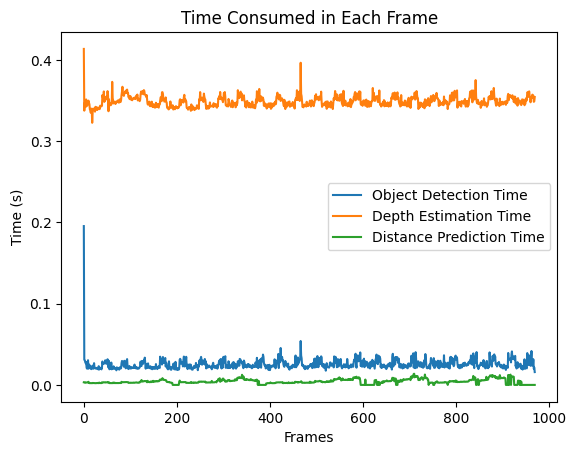

In [16]:
col_detect = [row[0] for row in time_logs]
col_depth = [row[1] for row in time_logs]
col_pred = [row[2] for row in time_logs]

# Plotting
plt.plot(frames, col_detect, label='Object Detection Time')
plt.plot(frames, col_depth, label='Depth Estimation Time')
plt.plot(frames, col_pred, label='Distance Prediction Time')

# Adding labels and title
plt.xlabel('Frames')
plt.ylabel('Time (s)')
plt.title('Time Consumed in Each Frame')

# Adding legend
plt.legend()

# Display the plot
plt.show()

#@Testing Image on Hypertuned XGBoost Model

Before (1242, 375)

0: 224x640 2 cars, 192.1ms
Speed: 1.9ms preprocess, 192.1ms inference, 1.8ms postprocess per image at shape (1, 3, 224, 640)
Loading base model ()...

Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master


Done.
Removing last two layers (global_pool & classifier).
Building Encoder-Decoder model..

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Done.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:17:54] WARNING: /workspace/src/common/error_msg.h:80: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

  warnings.warn(smsg, UserWarning)


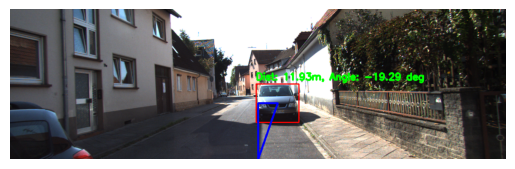

Calculated angles for bounding boxes: [-19.290046219188707]
Predicted distances for bounding boxes: [     11.932]


In [6]:
import torch
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import joblib
from infer import InferenceHelper
import xgboost as xgb
from PIL import ImageFont


# Assuming you have a YOLO class or function to load the model
model_yolo = YOLO("yolov8n.pt")
model_yolo.to(device)

# Load the image
img_path = '/content/gdrive/MyDrive/images/000003.png'
img = Image.open(img_path)
draw = ImageDraw.Draw(img)  # Create a draw object to add bounding boxes to the image


""" Logs """
print("Before", img.size)

# Perform YOLO inference
results = model_yolo(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# AdaBins
infer_helper = InferenceHelper(dataset='kitti', device=device)

# Predict depth of a single pillow image
bin_centers, predicted_depth = infer_helper.predict_pil(img)
predicted_depth_np = predicted_depth[0][0]

# # Display the depth map
# plt.imshow(predicted_depth_np, cmap='inferno')
# plt.colorbar()
# plt.title('Depth Map')
# plt.show()

def get_depth_features(depth_crop):
    # Be cautious with the depth values, if they are not integers, you may need a different approach to find the mode
    average_depth = np.mean(depth_crop)
    depth_variance = np.var(depth_crop)
    depth_median = np.median(depth_crop)
    depth_mode = np.bincount(depth_crop.astype(int).flatten()).argmax() if depth_crop.size else 0
    depth_range = np.ptp(depth_crop)
    depth_percentile_diff = np.percentile(depth_crop, 75) - np.percentile(depth_crop, 25)

    return average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff

# Load the trained Random Forest model
model_path = "/content/gdrive/MyDrive/Models/xgboost_model_TunedHyper_20features.pkl"
# Instead of joblib, you can directly use XGBoost's load_model function
xgb_model = xgb.XGBRegressor()
xgb_model = joblib.load(model_path)

# Filter out boxes for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.60)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

features_list = []
for box in boxes_xyxy:
    cropped_depth = predicted_depth_np[int(box[1]):int(box[3]), int(box[0]):int(box[2])]
    average_depth, depth_variance, depth_median, depth_mode, depth_range, depth_percentile_diff = get_depth_features(cropped_depth)

    BBox_left, BBox_top, BBox_right, BBox_bottom = box
    BBox_Width = BBox_right - BBox_left
    BBox_Height = BBox_bottom - BBox_top
    Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
    Aspect_Ratio = BBox_Width / BBox_Height
    Box_Area = BBox_Width * BBox_Height
    Box_Perimeter = 2 * (BBox_Width + BBox_Height)
    Centroid_x = (BBox_left + BBox_right) / 2
    Centroid_y = (BBox_top + BBox_bottom) / 2

    features = [
        BBox_left, BBox_top, BBox_right, BBox_bottom, average_depth,
        depth_variance, depth_median, depth_mode, depth_range,
        depth_percentile_diff, BBox_Width, BBox_Height, Diagonal,
        Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y
    ]
    features_list.append(features)

# Use the XGBoost model to predict the distance for each bounding box
predicted_distances = xgb_model.predict(np.array(features_list))

# Define the color for the lines
color = 'blue'  # PIL uses color names or tuples to define colors

# Get screen dimensions from the image
screen_center_x = img.width // 2
y_base = img.height  # Bottom of the image

# Modify the calculate_angle function to only use L3
def calculate_angle(screen_center_x, Centroid_x, L1_distance, L1_pixel_length, L3_pixel_length):
    # Calculate real-world distance of L3 using pixel ratio
    L3_real_distance = (L3_pixel_length / L1_pixel_length) * L1_distance

    # Calculate the angle theta using arccos
    # Ensure L3_real_distance is not greater than L1_distance to avoid math domain error
    theta_rad = np.arccos(min(L3_real_distance / L1_distance, 1))

    # Convert from radians to degrees
    theta_deg = np.degrees(theta_rad)

    # Determine the direction of the angle based on the position of the bounding box
    if Centroid_x < screen_center_x:
        # Bounding box is to the left of the screen center, angle is positive
        return theta_deg
    else:
        # Bounding box is to the right of the screen center, angle is negative
        return -theta_deg



# Convert the PIL Image to a NumPy array for OpenCV
img_np = np.array(img)

# Convert RGB to BGR (OpenCV uses BGR by default)
img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

font_scale = 0.8  # OpenCV font scale
font_thickness = 4  # Thickness of the font
blue_color = (255, 0, 0)  # Blue color in BGR

angles = []
# Define threshold values
max_distance = 15.0  # cars within 5 meters
lower_degree = 0  # 0 degree
higher_degree = 40  # 40 degrees

# Define colors
green_color = (0, 255, 0)
red_color = (0, 0, 255)




# Define additional threshold values for negative angles
lower_degree_negative = -40  # -40 degrees
higher_degree_negative = 0   # 0 degree

# ... [Rest of your existing code] ...

for box, L1_distance in zip(boxes_xyxy, predicted_distances):
    BBox_left, BBox_top, BBox_right, BBox_bottom = box[:4]
    x_center_bbox = int((BBox_left + BBox_right) / 2)
    y_center_bbox = int((BBox_top + BBox_bottom) / 2)

    L1_pixel_length = np.sqrt((x_center_bbox - screen_center_x)**2 + (y_center_bbox - y_base)**2)
    L3_pixel_length = abs(y_center_bbox - y_base)  # Calculate the vertical pixel distance

    # Call the modified function with these values
    angle = calculate_angle(screen_center_x, x_center_bbox, L1_distance, L1_pixel_length, L3_pixel_length)

    angles.append(angle)

    # Check if the detected car is within the distance and positive or negative angle thresholds
    if (L1_distance <= max_distance and lower_degree <= angle <= higher_degree) or \
       (lower_degree_negative <= angle <= higher_degree_negative):
        bbox_color = red_color
    else:
        bbox_color = green_color

    # Draw bounding box, lines, and text using cv2 with the determined color
    cv2.rectangle(img_np, (int(BBox_left), int(BBox_top)), (int(BBox_right), int(BBox_bottom)), bbox_color, 2)

    cv2.line(img_np, (screen_center_x, y_base), (x_center_bbox, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (x_center_bbox, y_center_bbox), (screen_center_x, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (screen_center_x, y_base), (screen_center_x, y_center_bbox), blue_color, font_thickness)

    display_text = f"Dist: {L1_distance:.2f}m, Angle: {angle:.2f} deg"
    text_x = int(BBox_left)
    text_y = int(BBox_top) - 10
    if text_y < 0:
        text_y = int(BBox_bottom) + 20
    cv2.putText(img_np, display_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), font_thickness)

# Display the image with bounding boxes and lines
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
#plt.title('Image with Bounding Boxes and Angle Estimation Lines')
plt.axis('off')  # Hide the axes
#save_path = '/content/gdrive/MyDrive/Research Report/000003.png'
# Save the figure to the specified path
#plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
plt.show()

# Print out the calculated angles
print("Calculated angles for bounding boxes:", angles)
print("Predicted distances for bounding boxes:", predicted_distances)






#@Testing Random Forest trained without Depth Map Features on Images


0: 224x640 1 car, 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 640)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


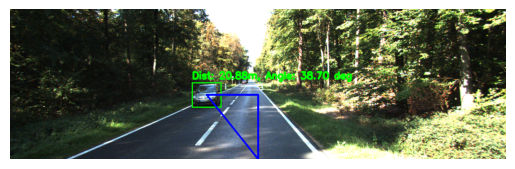

Calculated angles for bounding boxes: [38.703181281015596]
Predicted distances for bounding boxes: [     20.883]


In [7]:
import torch
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.ensemble import RandomForestRegressor
import cv2

# Assuming you have a YOLO class or function to load the model
# Make sure to replace 'YOLO' and 'yolov8n.pt' with your actual YOLO class and model file
model_yolo = YOLO("yolov8n.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_yolo.to(device)

# Load the image
img_path = '/content/gdrive/MyDrive/images/000013.png'
img = Image.open(img_path)
draw = ImageDraw.Draw(img)  # Create a draw object to add bounding boxes to the image

# Perform YOLO inference
results = model_yolo(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# Load the trained Random Forest model
model_path = "/content/gdrive/MyDrive/Models/random_forest_no_Greater_40.pkl"
rf_model = RandomForestRegressor()
rf_model = joblib.load(model_path)

# Filter out boxes for detected cars with confidence > 60%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

features_list = []
for box in boxes_xyxy:
    BBox_left, BBox_top, BBox_right, BBox_bottom = box
    BBox_Width = BBox_right - BBox_left
    BBox_Height = BBox_bottom - BBox_top
    Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
    Aspect_Ratio = BBox_Width / BBox_Height
    Box_Area = BBox_Width * BBox_Height
    Box_Perimeter = 2 * (BBox_Width + BBox_Height)
    Centroid_x = (BBox_left + BBox_right) / 2
    Centroid_y = (BBox_top + BBox_bottom) / 2

    features = [
        BBox_left, BBox_top, BBox_right, BBox_bottom,
        BBox_Width, BBox_Height, Diagonal, Aspect_Ratio,
        Box_Area, Box_Perimeter, Centroid_x, Centroid_y
    ]
    features_list.append(features)

# Use the Random Forest model to predict the distance for each bounding box
predicted_distances = rf_model.predict(np.array(features_list))

# Define the color for the lines
color = 'blue'  # PIL uses color names or tuples to define colors

# Get screen dimensions from the image
screen_center_x = img.width // 2
y_base = img.height  # Bottom of the image

# Modify the calculate_angle function to only use L3
def calculate_angle(screen_center_x, Centroid_x, L1_distance, L1_pixel_length, L3_pixel_length):
    # Calculate real-world distance of L3 using pixel ratio
    L3_real_distance = (L3_pixel_length / L1_pixel_length) * L1_distance

    # Calculate the angle theta using arccos
    # Ensure L3_real_distance is not greater than L1_distance to avoid math domain error
    theta_rad = np.arccos(min(L3_real_distance / L1_distance, 1))

    # Convert from radians to degrees
    theta_deg = np.degrees(theta_rad)

    # Determine the direction of the angle based on the position of the bounding box
    if Centroid_x < screen_center_x:
        # Bounding box is to the left of the screen center, angle is positive
        return theta_deg
    else:
        # Bounding box is to the right of the screen center, angle is negative
        return -theta_deg

# Convert the PIL Image to a NumPy array for OpenCV
img_np = np.array(img)

# Convert RGB to BGR (OpenCV uses BGR by default)
img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

font_scale = 0.8  # OpenCV font scale
font_thickness = 4  # Thickness of the font
blue_color = (255, 0, 0)  # Blue color in BGR

angles = []
# Define threshold values
max_distance = 15.0  # cars within 15 meters
lower_degree = 0  # 0 degree
higher_degree = 40  # 40 degrees

# Define colors
green_color = (0, 255, 0)
red_color = (0, 0, 255)

# Define additional threshold values for negative angles
lower_degree_negative = -40  # -40 degrees
higher_degree_negative = 0   # 0 degree

for box, L1_distance in zip(boxes_xyxy, predicted_distances):
    BBox_left, BBox_top, BBox_right, BBox_bottom = box[:4]
    x_center_bbox = int((BBox_left + BBox_right) / 2)
    y_center_bbox = int((BBox_top + BBox_bottom) / 2)

    L1_pixel_length = np.sqrt((x_center_bbox - screen_center_x)**2 + (y_center_bbox - y_base)**2)
    L3_pixel_length = abs(y_center_bbox - y_base)  # Calculate the vertical pixel distance

    # Call the modified function with these values
    angle = calculate_angle(screen_center_x, x_center_bbox, L1_distance, L1_pixel_length, L3_pixel_length)

    angles.append(angle)

    # Check if the detected car is within the distance and angle thresholds
    if (L1_distance <= max_distance and lower_degree <= angle <= higher_degree) or \
       (lower_degree_negative <= angle <= higher_degree_negative):
        bbox_color = red_color
    else:
        bbox_color = green_color

    # Draw bounding box, lines, and text using cv2 with the determined color
    cv2.rectangle(img_np, (int(BBox_left), int(BBox_top)), (int(BBox_right), int(BBox_bottom)), bbox_color, 2)

    cv2.line(img_np, (screen_center_x, y_base), (x_center_bbox, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (x_center_bbox, y_center_bbox), (screen_center_x, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (screen_center_x, y_base), (screen_center_x, y_center_bbox), blue_color, font_thickness)

    display_text = f"Dist: {L1_distance:.2f}m, Angle: {angle:.2f} deg"
    text_x = int(BBox_left)
    text_y = int(BBox_top) - 10
    if text_y < 0:
        text_y = int(BBox_bottom) + 20
    cv2.putText(img_np, display_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), font_thickness)

# Display the image with bounding boxes and lines
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
plt.axis('off')  # Hide the axes
#save_path = '/content/gdrive/MyDrive/Research Report/000003.png'
# Save the figure to the specified path
#plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
plt.show()

# Print out the calculated angles and predicted distances
print("Calculated angles for bounding boxes:", angles)
print("Predicted distances for bounding boxes:", predicted_distances)


#@Testing XGBoost trained without Depth Map features on Images


0: 224x640 1 car, 16.9ms
Speed: 3.4ms preprocess, 16.9ms inference, 8.9ms postprocess per image at shape (1, 3, 224, 640)


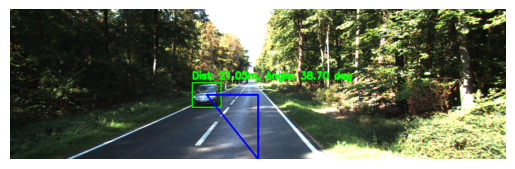

Calculated angles for bounding boxes: [38.703181281015596]
Predicted distances for bounding boxes: [     21.028]


In [8]:
import torch
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
import joblib
import xgboost as xgb
import cv2

# Assuming you have a YOLO class or function to load the model
# Make sure to replace 'YOLO' and 'yolov8n.pt' with your actual YOLO class and model file
model_yolo = YOLO("yolov8n.pt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_yolo.to(device)

# Load the image
img_path = '/content/gdrive/MyDrive/images/000013.png'
img = Image.open(img_path)
draw = ImageDraw.Draw(img)  # Create a draw object to add bounding boxes to the image

# Perform YOLO inference
results = model_yolo(img)

# Extract the boxes attribute from the results
bounding_boxes = results[0].boxes

# Load the trained XGBoost model
model_path = "/content/gdrive/MyDrive/Models/xgboost_model_no_Greater_40"
xgb_model = xgb.XGBRegressor()
xgb_model = joblib.load(model_path)

# Filter out boxes for detected cars with confidence > 55%
mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

features_list = []
for box in boxes_xyxy:
    BBox_left, BBox_top, BBox_right, BBox_bottom = box
    BBox_Width = BBox_right - BBox_left
    BBox_Height = BBox_bottom - BBox_top
    Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
    Aspect_Ratio = BBox_Width / BBox_Height
    Box_Area = BBox_Width * BBox_Height
    Box_Perimeter = 2 * (BBox_Width + BBox_Height)
    Centroid_x = (BBox_left + BBox_right) / 2
    Centroid_y = (BBox_top + BBox_bottom) / 2

    features = [
        BBox_left, BBox_top, BBox_right, BBox_bottom,
        BBox_Width, BBox_Height, Diagonal, Aspect_Ratio,
        Box_Area, Box_Perimeter, Centroid_x, Centroid_y
    ]
    features_list.append(features)

# Use the XGBoost model to predict the distance for each bounding box
predicted_distances = xgb_model.predict(np.array(features_list))

# Define the color for the lines
color = 'blue'  # PIL uses color names or tuples to define colors

# Get screen dimensions from the image
screen_center_x = img.width // 2
y_base = img.height  # Bottom of the image

# Modify the calculate_angle function to only use L3
def calculate_angle(screen_center_x, Centroid_x, L1_distance, L1_pixel_length, L3_pixel_length):
    # Calculate real-world distance of L3 using pixel ratio
    L3_real_distance = (L3_pixel_length / L1_pixel_length) * L1_distance

    # Calculate the angle theta using arccos
    # Ensure L3_real_distance is not greater than L1_distance to avoid math domain error
    theta_rad = np.arccos(min(L3_real_distance / L1_distance, 1))

    # Convert from radians to degrees
    theta_deg = np.degrees(theta_rad)

    # Determine the direction of the angle based on the position of the bounding box
    if Centroid_x < screen_center_x:
        # Bounding box is to the left of the screen center, angle is positive
        return theta_deg
    else:
        # Bounding box is to the right of the screen center, angle is negative
        return -theta_deg

# Convert the PIL Image to a NumPy array for OpenCV
img_np = np.array(img)

# Convert RGB to BGR (OpenCV uses BGR by default)
img_np = cv2.cvtColor(img_np, cv2.COLOR_RGB2BGR)

font_scale = 0.8  # OpenCV font scale
font_thickness = 4  # Thickness of the font
blue_color = (255, 0, 0)  # Blue color in BGR

angles = []
# Define threshold values
max_distance = 15.0  # cars within 15 meters
lower_degree = 0  # 0 degree
higher_degree = 40  # 40 degrees

# Define colors
green_color = (0, 255, 0)
red_color = (0, 0, 255)

# Define additional threshold values for negative angles
lower_degree_negative = -40  # -40 degrees
higher_degree_negative = 0   # 0 degree

for box, L1_distance in zip(boxes_xyxy, predicted_distances):
    BBox_left, BBox_top, BBox_right, BBox_bottom = box[:4]
    x_center_bbox = int((BBox_left + BBox_right) / 2)
    y_center_bbox = int((BBox_top + BBox_bottom) / 2)

    L1_pixel_length = np.sqrt((x_center_bbox - screen_center_x)**2 + (y_center_bbox - y_base)**2)
    L3_pixel_length = abs(y_center_bbox - y_base)  # Calculate the vertical pixel distance

    # Call the modified function with these values
    angle = calculate_angle(screen_center_x, x_center_bbox, L1_distance, L1_pixel_length, L3_pixel_length)

    angles.append(angle)

    # Check if the detected car is within the distance and angle thresholds
    if (L1_distance <= max_distance and lower_degree <= angle <= higher_degree) or \
       (lower_degree_negative <= angle <= higher_degree_negative):
        bbox_color = red_color
    else:
        bbox_color = green_color

    # Draw bounding box, lines, and text using cv2 with the determined color
    cv2.rectangle(img_np, (int(BBox_left), int(BBox_top)), (int(BBox_right), int(BBox_bottom)), bbox_color, 2)

    cv2.line(img_np, (screen_center_x, y_base), (x_center_bbox, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (x_center_bbox, y_center_bbox), (screen_center_x, y_center_bbox), blue_color, font_thickness)
    cv2.line(img_np, (screen_center_x, y_base), (screen_center_x, y_center_bbox), blue_color, font_thickness)

    display_text = f"Dist: {L1_distance:.2f}m, Angle: {angle:.2f} deg"
    text_x = int(BBox_left)
    text_y = int(BBox_top) - 10
    if text_y < 0:
        text_y = int(BBox_bottom) + 20
    cv2.putText(img_np, display_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), font_thickness)

# Display the image with bounding boxes and lines
plt.imshow(cv2.cvtColor(img_np, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
plt.axis('off')  # Hide the axes
# Uncomment the following two lines to save the image
# save_path = '/content/gdrive/MyDrive/Research Report/000003.png'
# plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
plt.show()

# Print out the calculated angles and predicted distances
print("Calculated angles for bounding boxes:", angles)
print("Predicted distances for bounding boxes:", predicted_distances)


#@Testing XGBoost, trained without depth map features on a video sequesnce

In [9]:

from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import joblib

import xgboost as xgb

from time import time

# Load the YOLO model

model_path = "yolov8n.pt"

model = YOLO(model_path)
model.conf = 0.55
model.iou = 0.45

model.to(device)
print(model.device)

# Load the XGBoost model
xgb_model_path = "/content/gdrive/MyDrive/Models/xgboost_model_no_Greater_40"
xgb_model = joblib.load(xgb_model_path)



# Function to calculate the angle
# Modify the calculate_angle function to only use L3
def calculate_angle(screen_center_x, Centroid_x, L1_distance, L1_pixel_length, L3_pixel_length):
    L3_real_distance = (L3_pixel_length / L1_pixel_length) * L1_distance
    theta_rad = np.arccos(min(L3_real_distance / L1_distance, 1))
    theta_deg = np.degrees(theta_rad)
    return theta_deg if Centroid_x < screen_center_x else -theta_deg



# Video source path
source = '/content/gdrive/MyDrive/Research Video.mp4'

# Load video
cap = cv2.VideoCapture(source)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

out_width = 1242
out_height = 375

# Define threshold values
max_distance = 20.0  # cars within 5 meters
lower_degree = 0  # 0 degree
higher_degree = 40  # 40 degrees

lower_degree_negative = -40  # -40 degrees
higher_degree_negative = 0   # 0 degree

# Define colors
green_color = (0, 255, 0)
red_color = (0, 0, 255)
blue_color = (255, 0, 0)  # Blue color in BGR

font_scale = 0.8  # OpenCV font scale
font_thickness = 4  # Thickness of the font

screen_center_x = out_width // 2
y_base = out_height

# Define codec and create VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/gdrive/MyDrive/Models/Annotated_Vehicle_Video without depth features.mp4',
                      fourcc, fps, (out_width, out_height))
# Start time for FPS calculation
start_time = time()

# Count the number of processed frames
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame to PIL Image for depth prediction
    frame = cv2.resize(frame, (out_width, out_height))
    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    frame_count += 1  # Increment frame count

    # Perform YOLO inference on the frame
    start = time()
    results = model(frame)
    print(f"Object_Detection :{time() - start}s")

    bounding_boxes = results[0].boxes

    # Filter out boxes for detected cars with confidence > 60%
    """
    The Error was due to the class index (It's 0 for this model not 2)
    (Reverted)
    """
    mask = (bounding_boxes.cls == 2) & (bounding_boxes.conf > 0.55)
    boxes_xyxy = bounding_boxes.xyxy[mask].cpu().numpy()

    # Process each detection
    for box in boxes_xyxy:
        x1, y1, x2, y2 = map(int, box[:4])


        # Extract additional features for the bounding box
        BBox_Width = x2 - x1
        BBox_Height = y2 - y1
        Diagonal = np.sqrt(BBox_Width**2 + BBox_Height**2)
        Aspect_Ratio = BBox_Width / BBox_Height
        Box_Area = BBox_Width * BBox_Height
        Box_Perimeter = 2 * (BBox_Width + BBox_Height)
        Centroid_x = (x1 + x2) // 2
        Centroid_y = (y1 + y2) // 2

        features = [
            x1, y1, x2, y2,
            BBox_Width, BBox_Height, Diagonal,
            Aspect_Ratio, Box_Area, Box_Perimeter, Centroid_x, Centroid_y
        ]

        L1_distance = xgb_model.predict(np.array([features]))[0]

        # Predict the distance using the XGBoost model
        L1_pixel_length = np.sqrt((Centroid_x - screen_center_x)**2 + (Centroid_y - y_base)**2)
        L3_pixel_length = abs(Centroid_y - y_base)  # Calculate the vertical pixel distance

        angle = calculate_angle(screen_center_x, Centroid_x, L1_distance, L1_pixel_length, L3_pixel_length)

        # angles.append(angle)

        # Check if the detected car is within the distance and positive or negative angle thresholds
        if (L1_distance <= max_distance and lower_degree <= angle <= higher_degree) or \
          (lower_degree_negative <= angle <= higher_degree_negative):
            bbox_color = red_color
        else:
            bbox_color = green_color

        # Draw bounding box, labels, lines, and text using cv2
        cv2.rectangle(frame, (x1, y1), (x2, y2), bbox_color, 2)

        cv2.line(frame, (screen_center_x, y_base), (Centroid_x, Centroid_y), blue_color, font_thickness)
        cv2.line(frame, (Centroid_x, Centroid_y), (screen_center_x, Centroid_y), blue_color, font_thickness)
        cv2.line(frame, (screen_center_x, y_base), (screen_center_x, Centroid_y), blue_color, font_thickness)

        """
        Edit (Commented)
        """
        # cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        display_text = f"Dist: {L1_distance:.2f}m, Angle: {angle:.2f}deg"
        text_x = int(x1)
        text_y = int(y1) - 10
        if text_y < 0:
            text_y = int(y2) + 20
        cv2.putText(frame, display_text, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 255, 0), font_thickness)

    # Write the annotated frame to the output video file
    out.write(frame)
# Calculate the processing duration and FPS
end_time = time()
processing_duration = end_time - start_time
fps_processed = frame_count / processing_duration

print(f"Processed {frame_count} frames in {processing_duration:.2f} seconds.")
print(f"Average processing speed: {fps_processed:.2f} frames per second.")

# Release everything when done
cap.release()
out.release()
cv2.destroyAllWindows()


cuda:0

0: 224x640 1 car, 15.7ms
Speed: 1.8ms preprocess, 15.7ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.12303638458251953s

0: 224x640 1 car, 25.4ms
Speed: 3.2ms preprocess, 25.4ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.04663681983947754s

0: 224x640 1 car, 12.4ms
Speed: 1.7ms preprocess, 12.4ms inference, 2.2ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.023546695709228516s

0: 224x640 1 car, 16.9ms
Speed: 1.8ms preprocess, 16.9ms inference, 2.1ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03499341011047363s

0: 224x640 1 car, 11.1ms
Speed: 1.9ms preprocess, 11.1ms inference, 1.7ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.025511980056762695s

0: 224x640 1 car, 13.3ms
Speed: 1.7ms preprocess, 13.3ms inference, 2.6ms postprocess per image at shape (1, 3, 224, 640)
Object_Detection :0.03200387954711914s

0: 224x640 1 car, 